In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [11]:
 # define your regions here
presel = {
    
        "mu": {
            "lep_fj_dr003": "( ( lep_fj_dr>0.03) )", 
            "lep_fj_dr08": "( ( lep_fj_dr<0.8) )",   
            "fj_pt300": "( ( fj_pt>300) )",   
            "dphi<1.57": "(abs_met_fj_dphi<1.57)"
        },
        "ele": {
            "lep_fj_dr003": "( ( lep_fj_dr>0.03) )", 
            "lep_fj_dr08": "( ( lep_fj_dr<0.8) )",   
            "fj_pt300": "( ( fj_pt>300) )", 
            "dphi<1.57": "(abs_met_fj_dphi<1.57)"  
        },
}

from make_stacked_hists import make_events_dict
channels = ["ele", "mu"]
samples = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
#     "Data"
]

years = ["2017", "2016", "2016APV", "2018"]

In [12]:
events_dict = {}

In [13]:
### new corrections
samples_dir = {
    "2016":    "../eos/postprocessNov12_2016",
    "2016APV": "../eos/postprocessNov12_2016APV",
    "2017":    "../eos/postprocessNov12_2017",
    "2018":    "../eos/postprocessNov12_2018",
}
events_dict["miso"] = {}
for year in years:

    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="signal_region")
    events_dict["miso"] = {**events_dict["miso"], **out}

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3841 events
INFO:root:Applying lep_fj_dr08 selection on 3841 events
INFO:root:Applying fj_pt300 selection on 3841 events
INFO:root:Applying dphi<1.57 selection on 67 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4 events
INFO:root:tot event weight 5.742591831366373 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 362 events
INFO:root:Applying lep_fj_dr08 selection on 362 events
INFO:root:Applying fj_pt300 selection on 362 events
INFO:root:Applying dphi<1.57 selection on 71 events
INFO:root:Will fill the DYJets dataframe with the remaining 28 events
INFO:root:tot event weight 490.12402608825226 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should co

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 129307 events
INFO:root:Applying lep_fj_dr08 selection on 129307 events
INFO:root:Applying fj_pt300 selection on 129307 events
INFO:root:Applying dphi<1.57 selection on 118177 events
INFO:root:Will fill the DYJets dataframe with the remaining 72837 events
INFO:root:tot event weight 673.6484138946835 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 921 events
INFO:root:Applying lep_fj_dr08 selection on 921 events
INFO:root:Applying fj_pt300 selection on 921 events
INFO:root:Applying dphi<1.57 selection on 220 events
INFO:root:Will fill the VBF dataframe with the remaining 146 events
INFO:root:tot event weight 6.062193975858574 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event we

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 156188 events
INFO:root:Applying lep_fj_dr08 selection on 156188 events
INFO:root:Applying fj_pt300 selection on 156188 events
INFO:root:Applying dphi<1.57 selection on 135692 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 105758 events
INFO:root:tot event weight 4800.3936180852925 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 866757 events
INFO:root:Applying lep_fj_dr08 selection on 866757 events
INFO:root:Applying fj_pt300 selection on 866757 events
INFO:root:Applying dphi<1.57 selection on 332276 events
INFO:root:Will fill the TTbar dataframe with the remaining 237637 events
INFO:root:tot event weight 27266.946855383816 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored 

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 197217 events
INFO:root:Applying lep_fj_dr08 selection on 197217 events
INFO:root:Applying fj_pt300 selection on 197217 events
INFO:root:Applying dphi<1.57 selection on 183730 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 145798 events
INFO:root:tot event weight 1490.1803489445622 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 111330 events
INFO:root:Applying lep_fj_dr08 selection on 111330 events
INFO:root:Applying fj_pt300 selection on 111330 events
INFO:root:Applying dphi<1.57 selection on 5873 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3497 events
INFO:root:tot event weight 1304.3611489595532 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:Applying lep_fj_dr003 selection on 27132 events
INFO:root:Applying lep_fj_dr08 selection on 27132 events
INFO:root:Applying fj_pt300 selection on 27132 events
INFO:root:Applying dphi<1.57 selection on 13503 events
INFO:root:Will fill the SingleTop dataframe with the remaining 9616 events
INFO:root:tot event weight 31.667189782723522 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 20199 events
INFO:root:Applying lep_fj_dr08 selection on 20199 events
INFO:root:Applying fj_pt300 selection on 20199 events
INFO:root:Applying dphi<1.57 selection on 4098 events
INFO:root:Will fill the DYJets dataframe with the remaining 1870 events
INFO:root:tot event weight 334.6743142844812 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 893 e

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:Applying fj_pt300 selection on 1058 events
INFO:root:Applying dphi<1.57 selection on 625 events
INFO:root:Will fill the WZQQ dataframe with the remaining 235 events
INFO:root:tot event weight 29.786680620364173 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu


Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 128874 events
INFO:root:Applying lep_fj_dr08 selection on 128874 events
INFO:root:Applying fj_pt300 selection on 128874 events
INFO:root:Applying dphi<1.57 selection on 92579 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 68071 events
INFO:root:tot event weight 6517.877689495522 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1583 events
INFO:root:Applying lep_fj_dr08 selection on 1583 events
INFO:root:Applying fj_pt300 selection on 1583 events
INFO:root:Applying dphi<1.57 selection on 996 events
INFO:root:Will fill the WZQQ dataframe with the remaining 417 events
INFO:root:tot event weight 134.40961658871151 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event wei

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Will fill the WJetsLNu dataframe with the remaining 42714 events
INFO:root:tot event weight 37.10113914434725 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 11238 events
INFO:root:Applying lep_fj_dr08 selection on 11238 events
INFO:root:Applying fj_pt300 selection on 11238 events
INFO:root:Applying dphi<1.57 selection on 4739 events
INFO:root:Will fill the ttH dataframe with the remaining 2970 events
INFO:root:tot event weight 9.927446293637141 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1308 events
INFO:root:Applying lep_fj_dr08 selection on 1308 events
INFO:root:Applying fj_pt300 selection on 1308 events
INFO:root:Applying dphi<1.57 selection on 1110 events
INFO:root:Will fill the WZQQ dataframe with the remaining 491 

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 275765 events
INFO:root:Applying lep_fj_dr08 selection on 275765 events
INFO:root:Applying fj_pt300 selection on 275765 events
INFO:root:Applying dphi<1.57 selection on 49893 events
INFO:root:Will fill the DYJets dataframe with the remaining 24312 events
INFO:root:tot event weight 1316.7298541713594 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 4407 events
INFO:root:Applying lep_fj_dr08 selection on 4407 events
INFO:root:Applying fj_pt300 selection on 4407 events
INFO:root:Applying dphi<1.57 selection on 74 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 5 events
INFO:root:tot event weight 6.3899134575293175 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1426 events
INFO:root:Applying lep_fj_dr08 selection on 1426 events
INFO:root:Applying fj_pt300 selection on 1426 events
INFO:root:Applying dphi<1.57 selection on 405 events
INFO:root:Will fill the VBF dataframe with the remaining 312 events
INFO:root:tot event weight 12.92205239542422 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13078 events
INFO:root:Applying lep_fj_dr08 selection on 13078 events
INFO:root:Applying fj_pt300 selection on 13078 events
INFO:root:Applying dphi<1.57 selection on 3998 events
INFO:root:Will fill the VH dataframe with the remaining 2956 events
INFO:root:tot event weight 1.9825894502721875 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 213045 events
INFO:root:Applying lep_fj_dr08 selection on 213045 events
INFO:root:Applying fj_pt300 selection on 213045 events
INFO:root:Applying dphi<1.57 selection on 186200 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 146888 events
INFO:root:tot event weight 6941.314318719092 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 943577 events
INFO:root:Applying lep_fj_dr08 selection on 943577 events
INFO:root:Applying fj_pt300 selection on 943577 events
INFO:root:Applying dphi<1.57 selection on 355014 events
INFO:root:Will fill the TTbar dataframe with the remaining 254863 events
INFO:root:tot event weight 29119.31817529 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 270374 events
INFO:root:Applying lep_fj_dr08 selection on 270374 events
INFO:root:Applying fj_pt300 selection on 270374 events
INFO:root:Applying dphi<1.57 selection on 253351 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 204730 events
INFO:root:tot event weight 2174.5606193005096 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 138315 events
INFO:root:Applying lep_fj_dr08 selection on 138315 events
INFO:root:Applying fj_pt300 selection on 138315 events
INFO:root:Applying dphi<1.57 selection on 6300 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3789 events
INFO:root:tot event weight 1485.6086476552564 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 36615 events
INFO:root:Applying lep_fj_dr08 selection on 36615 events
INFO:root:Applying fj_pt300 selection on 36615 events
INFO:root:Applying dphi<1.57 selection on 17245 events
INFO:root:Will fill the SingleTop dataframe with the remaining 12349 events
INFO:root:tot event weight 35.37237087463976 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 22422 events
INFO:root:Applying lep_fj_dr08 selection on 22422 events
INFO:root:Applying fj_pt300 selection on 22422 events
INFO:root:Applying dphi<1.57 selection on 4464 events
INFO:root:Will fill the DYJets dataframe with the remaining 2081 events
INFO:root:tot event weight 404.7220740125705 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
I

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:Applying lep_fj_dr003 selection on 1106 events
INFO:root:Applying lep_fj_dr08 selection on 1106 events
INFO:root:Applying fj_pt300 selection on 1106 events
INFO:root:Applying dphi<1.57 selection on 886 events
INFO:root:Will fill the WZQQ dataframe with the remaining 652 events
INFO:root:tot event weight 65.55525762337803 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 997 events
INFO:root:Applying lep_fj_dr08 selection on 997 events
INFO:root:Applying fj_pt300 selection on 997 events
INFO:root:Applying dphi<1.57 selection on 370 events
INFO:root:Will fill the WZQQ dataframe with the remaining 258 events
INFO:root:tot event weight 33.45853031998887 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 175965 events
INFO:root:Applying lep_fj_dr08 selection on 175965 events
INFO:root:Applying fj_pt300 selection on 175965 events
INFO:root:Applying dphi<1.57 selection on 124975 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 92023 events
INFO:root:tot event weight 9276.608088961597 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 682 events
INFO:root:Applying lep_fj_dr08 selection on 682 events
INFO:root:Applying fj_pt300 selection on 682 events
INFO:root:Applying dphi<1.57 selection on 263 events
INFO:root:Will fill the WZQQ dataframe with the remaining 169 events
INFO:root:tot event weight 41.44314896724559 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Applying lep_fj_dr003 selection on 77865 events
INFO:root:Applying lep_fj_dr08 selection on 77865 events
INFO:root:Applying fj_pt300 selection on 77865 events
INFO:root:Applying dphi<1.57 selection on 74965 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 59972 events
INFO:root:tot event weight 53.348177692547196 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10498 events
INFO:root:Applying lep_fj_dr08 selection on 10498 events
INFO:root:Applying fj_pt300 selection on 10498 events
INFO:root:Applying dphi<1.57 selection on 4675 events
INFO:root:Will fill the ttH dataframe with the remaining 3067 events
INFO:root:tot event weight 10.316637668003281 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1250 events

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 199435 events
INFO:root:Applying lep_fj_dr08 selection on 199435 events
INFO:root:Applying fj_pt300 selection on 199435 events
INFO:root:Applying dphi<1.57 selection on 31747 events
INFO:root:Will fill the DYJets dataframe with the remaining 17742 events
INFO:root:tot event weight 945.1394033528582 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1145 events
INFO:root:Applying lep_fj_dr08 selection on 1145 events
INFO:root:Applying fj_pt300 selection on 1145 events
INFO:root:Applying dphi<1.57 selection on 20 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1 events
INFO:root:tot event weight 1.6231808788725475 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets


Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 125157 events
INFO:root:Applying lep_fj_dr08 selection on 125157 events
INFO:root:Applying fj_pt300 selection on 125157 events
INFO:root:Applying dphi<1.57 selection on 112562 events
INFO:root:Will fill the DYJets dataframe with the remaining 69701 events
INFO:root:tot event weight 276.70121652631747 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 452 events
INFO:root:Applying lep_fj_dr08 selection on 452 events
INFO:root:Applying fj_pt300 selection on 452 events
INFO:root:Applying dphi<1.57 selection on 96 events
INFO:root:Will fill the VBF dataframe with the remaining 62 events
INFO:root:tot event weight 2.21304040965813 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 63781 events
INFO:root:Applying lep_fj_dr08 selection on 63781 events
INFO:root:Applying fj_pt300 selection on 63781 events
INFO:root:Applying dphi<1.57 selection on 55347 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 43709 events
INFO:root:tot event weight 1879.175616234387 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 75025 events
INFO:root:Applying lep_fj_dr08 selection on 75025 events
INFO:root:Applying fj_pt300 selection on 75025 events
INFO:root:Applying dphi<1.57 selection on 28112 events
INFO:root:Will fill the TTbar dataframe with the remaining 20327 events
INFO:root:tot event weight 10271.047732460376 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 88

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 20179 events
INFO:root:Applying lep_fj_dr08 selection on 20179 events
INFO:root:Applying fj_pt300 selection on 20179 events
INFO:root:Applying dphi<1.57 selection on 3602 events
INFO:root:Will fill the DYJets dataframe with the remaining 1616 events
INFO:root:tot event weight 100.3465534108903 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1039 events
INFO:root:Applying lep_fj_dr08 selection on 1039 events
INFO:root:Applying fj_pt300 selection on 1039 events
INFO:root:Applying dphi<1.57 selection on 1012 events
INFO:root:Will fill the QCD dataframe with the remaining 430 events
INFO:root:tot event weight 0.11650971764203494 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr0

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 624 events
INFO:root:Applying lep_fj_dr08 selection on 624 events
INFO:root:Applying fj_pt300 selection on 624 events
INFO:root:Applying dphi<1.57 selection on 327 events
INFO:root:Will fill the WZQQ dataframe with the remaining 136 events
INFO:root:tot event weight 13.181341724872595 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 49996 events
INFO:root:Applying lep_fj_dr08 selection on 49996 events
INFO:root:Applying fj_pt300 selection on 49996 events
INFO:root:Applying dphi<1.57 selection on 35364 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 26163 events
INFO:root:tot event weight 2506.3706550377174 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ


Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 761 events
INFO:root:Applying lep_fj_dr08 selection on 761 events
INFO:root:Applying fj_pt300 selection on 761 events
INFO:root:Applying dphi<1.57 selection on 439 events
INFO:root:Will fill the WZQQ dataframe with the remaining 191 events
INFO:root:tot event weight 35.57951188153804 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 33311 events
INFO:root:Applying lep_fj_dr08 selection on 33311 events
INFO:root:Applying fj_pt300 selection on 33311 events
INFO:root:Applying dphi<1.57 selection on 31824 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 24897 events
INFO:root:tot event weight 14.480620931769362 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 767 events
INFO:root:Applying lep_fj_dr08 selection on 767 events
INFO:root:Applying fj_pt300 selection on 767 events
INFO:root:Applying dphi<1.57 selection on 667 events
INFO:root:Will fill the WZQQ dataframe with the remaining 321 events
INFO:root:tot event weight 18.363457524217694 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 5202 events
INFO:root:Applying lep_fj_dr08 selection on 5202 events
INFO:root:Applying fj_pt300 selection on 5202 events
INFO:root:Applying dphi<1.57 selection on 5016 events
INFO:root:Will fill the QCD dataframe with the remaining 2198 events
INFO:root:tot event weight 25.98389689498358 

INFO:root:Finding WJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 259992 events
INFO:root:Applying lep_fj_dr08 selection on 259992 events
INFO:root:Applying fj_pt300 selection on 259992 events
INFO:root:Applying dphi<1.57 selection on 42325 events
INFO:root:Will fill the DYJets dataframe with the remaining 20346 events
INFO:root:tot event weight 431.76556319730184 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1273 events
INFO:root:Applying lep_fj_dr08 selection on 1273 events
INFO:root:Applying fj_pt300 selection on 1273 events
INFO:root:Applying dphi<1.57 selection on 31 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 6121 events
INFO:root:Applying lep_fj_dr08 selection on 6121 events
INFO:root:Applying fj_pt300 selection on 6121 events
INFO:root:Applying dphi<1.57 selection on 1880 events
INFO:root:Will fill the VH dataframe with the remaining 1369 events
INFO:root:tot event weight 0.8085437036716763 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 92490 events
INFO:root:Applying lep_fj_dr08 selection on 92490 events
INFO:root:Applying fj_pt300 selection on 92490 events
INFO:root:Applying dphi<1.57 selection on 80231 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 63819 events
INFO:root:tot event weight 2831.128441063691 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 87877 events
INFO:root:Applying lep_fj_dr08 selection on 87877 events
INFO:root:Applying fj_pt300 selection on 87877 events
INFO:root:Applying dphi<1.57 selection on 32129 events
INFO:root:Will fill the TTbar dataframe with the remaining 23281 events
INFO:root:tot event weight 11420.898913805191 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 18

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 23982 events
INFO:root:Applying lep_fj_dr08 selection on 23982 events
INFO:root:Applying fj_pt300 selection on 23982 events
INFO:root:Applying dphi<1.57 selection on 4472 events
INFO:root:Will fill the DYJets dataframe with the remaining 2121 events
INFO:root:tot event weight 148.8396386259666 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 461 events
INFO:root:Applying lep_fj_dr08 selection on 461 events
INFO:root:Applying fj_pt300 selection on 461 events
INFO:root:Applying dphi<1.57 selection on 454 events
INFO:root:Will fill the QCD dataframe with the remaining 343 events
INFO:root:tot event weight 0.09489991428678055 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 s

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 2585 events
INFO:root:Applying lep_fj_dr08 selection on 2585 events
INFO:root:Applying fj_pt300 selection on 2585 events
INFO:root:Applying dphi<1.57 selection on 1664 events
INFO:root:Will fill the QCD dataframe with the remaining 1181 events
INFO:root:tot event weight 2358.7573598161007 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 551 events
INFO:root:Applying lep_fj_dr08 selection on 551 events
INFO:root:Applying fj_pt300 selection on 551 events
INFO:root:Applying dphi<1.57 selection on 409 events
INFO:root:Will fill the WZQQ dataframe with the remaining 304 events
INFO:root:tot event weight 26.611241315315837 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applyin

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr003 selection on 73761 events
INFO:root:Applying lep_fj_dr08 selection on 73761 events
INFO:root:Applying fj_pt300 selection on 73761 events
INFO:root:Applying dphi<1.57 selection on 51318 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 37979 events
INFO:root:tot event weight 3713.5318034852894 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 400 events
INFO:root:Applying lep_fj_dr08 selection on 400 events
INFO:root:Applying fj_pt300 selection on 400 events
INFO:root:Applying dphi<1.57 selection on 156 events
INFO:root:Will fill the WZQQ dataframe with the remaining 102 events
INFO:root:tot event weight 18.123101283103278 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 48459

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10484 events
INFO:root:Applying lep_fj_dr08 selection on 10484 events
INFO:root:Applying fj_pt300 selection on 10484 events
INFO:root:Applying dphi<1.57 selection on 4485 events
INFO:root:Will fill the ttH dataframe with the remaining 3010 events
INFO:root:tot event weight 4.183903345792388 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 782 events
INFO:root:Applying lep_fj_dr08 selection on 782 events
INFO:root:Applying fj_pt300 selection on 782 events
INFO:root:Applying dphi<1.57 selection on 619 events
INFO:root:Will fill the WZQQ dataframe with the remaining 512 events
INFO:root:tot event weight 28.170524049648602 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying le

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 187926 events
INFO:root:Applying lep_fj_dr08 selection on 187926 events
INFO:root:Applying fj_pt300 selection on 187926 events
INFO:root:Applying dphi<1.57 selection on 29429 events
INFO:root:Will fill the DYJets dataframe with the remaining 16378 events
INFO:root:tot event weight 370.9003267713395 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1272 events
INFO:root:Applying lep_fj_dr08 selection on 1272 events
INFO:root:Applying fj_pt300 selection on 1272 events
INFO:root:Applying dphi<1.57 selection on 21 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets


Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 133624 events
INFO:root:Applying lep_fj_dr08 selection on 133624 events
INFO:root:Applying fj_pt300 selection on 133624 events
INFO:root:Applying dphi<1.57 selection on 120278 events
INFO:root:Will fill the DYJets dataframe with the remaining 72841 events
INFO:root:tot event weight 304.8887892834359 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 421 events
INFO:root:Applying lep_fj_dr08 selection on 421 events
INFO:root:Applying fj_pt300 selection on 421 events
INFO:root:Applying dphi<1.57 selection on 89 events
INFO:root:Will fill the VBF dataframe with the remaining 60 events
INFO:root:tot event weight 2.5187724896386507 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event wei

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 71245 events
INFO:root:Applying lep_fj_dr08 selection on 71245 events
INFO:root:Applying fj_pt300 selection on 71245 events
INFO:root:Applying dphi<1.57 selection on 61488 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 48312 events
INFO:root:tot event weight 2029.0525315603593 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 90915 events
INFO:root:Applying lep_fj_dr08 selection on 90915 events
INFO:root:Applying fj_pt300 selection on 90915 events
INFO:root:Applying dphi<1.57 selection on 33901 events
INFO:root:Will fill the TTbar dataframe with the remaining 24643 events
INFO:root:tot event weight 10931.869094166519 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 7

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:Applying lep_fj_dr003 selection on 77435 events
INFO:root:Applying lep_fj_dr08 selection on 77435 events
INFO:root:Applying fj_pt300 selection on 77435 events
INFO:root:Applying dphi<1.57 selection on 71952 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 57606 events
INFO:root:tot event weight 620.3058749831815 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 40308 events
INFO:root:Applying lep_fj_dr08 selection on 40308 events
INFO:root:Applying fj_pt300 selection on 40308 events
INFO:root:Applying dphi<1.57 selection on 1730 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1033 events
INFO:root:tot event weight 420.6302400871682 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr0

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:Applying lep_fj_dr003 selection on 11010 events
INFO:root:Applying lep_fj_dr08 selection on 11010 events
INFO:root:Applying fj_pt300 selection on 11010 events
INFO:root:Applying dphi<1.57 selection on 2069 events
INFO:root:Will fill the DYJets dataframe with the remaining 873 events
INFO:root:tot event weight 128.19122388069775 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 946 events
INFO:root:Applying lep_fj_dr08 selection on 946 events
INFO:root:Applying fj_pt300 selection on 946 events
INFO:root:Applying dphi<1.57 selection on 921 events
INFO:root:Will fill the QCD dataframe with the remaining 382 events
INFO:root:tot event weight 0.11967699141016547 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3472 events
INFO:root:Applying lep_fj

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:Applying lep_fj_dr003 selection on 655 events
INFO:root:Applying lep_fj_dr08 selection on 655 events
INFO:root:Applying fj_pt300 selection on 655 events
INFO:root:Applying dphi<1.57 selection on 346 events
INFO:root:Will fill the WZQQ dataframe with the remaining 122 events
INFO:root:tot event weight 11.942257124073805 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 49939 events
INFO:root:Applying lep_fj_dr08 selection on 49939 events
INFO:root:Applying fj_pt300 selection on 49939 events
INFO:root:Applying dphi<1.57 selection on 35120 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 26073 events
INFO:root:tot event weight 2744.6085737503518 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight


Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr003 selection on 1222 events
INFO:root:Applying lep_fj_dr08 selection on 1222 events
INFO:root:Applying fj_pt300 selection on 1222 events
INFO:root:Applying dphi<1.57 selection on 733 events
INFO:root:Will fill the WZQQ dataframe with the remaining 300 events
INFO:root:tot event weight 42.4550071156574 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 36148 events
INFO:root:Applying lep_fj_dr08 selection on 36148 events
INFO:root:Applying fj_pt300 selection on 36148 events
INFO:root:Applying dphi<1.57 selection on 34473 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 27053 events
INFO:root:tot event weight 15.393706485909904 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 8732 events

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 518 events
INFO:root:Applying lep_fj_dr08 selection on 518 events
INFO:root:Applying fj_pt300 selection on 518 events
INFO:root:Applying dphi<1.57 selection on 428 events
INFO:root:Will fill the WZQQ dataframe with the remaining 172 events
INFO:root:tot event weight 14.753052042402075 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 4416 events
INFO:root:Applying lep_fj_dr08 selection on 4416 events
INFO:root:Applying fj_pt300 selection on 4416 events
INFO:root:Applying dphi<1.57 selection on 4229 events
INFO:root:Will fill the QCD dataframe with the remaining 1814 events
INFO:root:tot event weight 25.35059733472111 

INFO:root:Finding WJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 262038 events
INFO:root:Applying lep_fj_dr08 selection on 262038 events
INFO:root:Applying fj_pt300 selection on 262038 events
INFO:root:Applying dphi<1.57 selection on 42345 events
INFO:root:Will fill the DYJets dataframe with the remaining 20090 events
INFO:root:tot event weight 471.15112645259023 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1391 events
INFO:root:Applying lep_fj_dr08 selection on 1391 events
INFO:root:Applying fj_pt300 selection on 1391 events
INFO:root:Applying dphi<1.57 selection on 26 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 5281 events
INFO:root:Applying lep_fj_dr08 selection on 5281 events
INFO:root:Applying fj_pt300 selection on 5281 events
INFO:root:Applying dphi<1.57 selection on 1566 events
INFO:root:Will fill the VH dataframe with the remaining 1197 events
INFO:root:tot event weight 0.8931862201783072 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 105815 events
INFO:root:Applying lep_fj_dr08 selection on 105815 events
INFO:root:Applying fj_pt300 selection on 105815 events
INFO:root:Applying dphi<1.57 selection on 91754 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 72861 events
INFO:root:tot event weight 3152.113615755196 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 107586 events
INFO:root:Applying lep_fj_dr08 selection on 107586 events
INFO:root:Applying fj_pt300 selection on 107586 events
INFO:root:Applying dphi<1.57 selection on 38865 events
INFO:root:Will fill the TTbar dataframe with the remaining 28168 events
INFO:root:tot event weight 12435.957552748043 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 116504 events
INFO:root:Applying lep_fj_dr08 selection on 116504 events
INFO:root:Applying fj_pt300 selection on 116504 events
INFO:root:Applying dphi<1.57 selection on 109148 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 88727 events
INFO:root:tot event weight 986.8133116889696 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 52559 events
INFO:root:Applying lep_fj_dr08 selection on 52559 events
INFO:root:Applying fj_pt300 selection on 52559 events
INFO:root:Applying dphi<1.57 selection on 1869 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1122 events
INFO:root:tot event weight 451.8266917996981 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using alre

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13022 events
INFO:root:Applying lep_fj_dr08 selection on 13022 events
INFO:root:Applying fj_pt300 selection on 13022 events
INFO:root:Applying dphi<1.57 selection on 2389 events
INFO:root:Will fill the DYJets dataframe with the remaining 1099 events
INFO:root:tot event weight 135.55379824892373 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 503 events
INFO:root:Applying lep_fj_dr08 selection on 503 events
INFO:root:Applying fj_pt300 selection on 503 events
INFO:root:Applying dphi<1.57 selection on 499 events
INFO:root:Will fill the QCD dataframe with the remaining 373 events
INFO:root:tot event weight 0.11459243473693428 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 2414 events
INFO:root:Applying lep_fj_dr08 selection on 2414 events
INFO:root:Applying fj_pt300 selection on 2414 events
INFO:root:Applying dphi<1.57 selection on 1547 events
INFO:root:Will fill the QCD dataframe with the remaining 1090 events
INFO:root:tot event weight 2499.954797225003 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 890 events
INFO:root:Applying lep_fj_dr08 selection on 890 events
INFO:root:Applying fj_pt300 selection on 890 events
INFO:root:Applying dphi<1.57 selection on 703 events
INFO:root:Will fill the WZQQ dataframe with the remaining 520 events
INFO:root:tot event weight 35.26651680470394 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying 

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr003 selection on 74559 events
INFO:root:Applying lep_fj_dr08 selection on 74559 events
INFO:root:Applying fj_pt300 selection on 74559 events
INFO:root:Applying dphi<1.57 selection on 51734 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 38284 events
INFO:root:tot event weight 4133.562163889034 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 590 events
INFO:root:Applying lep_fj_dr08 selection on 590 events
INFO:root:Applying fj_pt300 selection on 590 events
INFO:root:Applying dphi<1.57 selection on 244 events
INFO:root:Will fill the WZQQ dataframe with the remaining 152 events
INFO:root:tot event weight 21.24326055448305 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 53568 e

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Applying lep_fj_dr08 selection on 53568 events
INFO:root:Applying fj_pt300 selection on 53568 events
INFO:root:Applying dphi<1.57 selection on 51459 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 41278 events
INFO:root:tot event weight 24.394324107221593 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 8975 events
INFO:root:Applying lep_fj_dr08 selection on 8975 events
INFO:root:Applying fj_pt300 selection on 8975 events
INFO:root:Applying dphi<1.57 selection on 3850 events
INFO:root:Will fill the ttH dataframe with the remaining 2668 events
INFO:root:tot event weight 4.889419196603622 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 608 events
INFO:root:Applying lep_fj_dr08 selection on 608 events
INFO:ro

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 190890 events
INFO:root:Applying lep_fj_dr08 selection on 190890 events
INFO:root:Applying fj_pt300 selection on 190890 events
INFO:root:Applying dphi<1.57 selection on 29467 events
INFO:root:Will fill the DYJets dataframe with the remaining 16500 events
INFO:root:tot event weight 407.31057098312755 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 2866 events
INFO:root:Applying lep_fj_dr08 selection on 2866 events
INFO:root:Applying fj_pt300 selection on 2866 events
INFO:root:Applying dphi<1.57 selection on 52 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Ap

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 115308 events
INFO:root:Applying lep_fj_dr08 selection on 115308 events
INFO:root:Applying fj_pt300 selection on 115308 events
INFO:root:Applying dphi<1.57 selection on 104695 events
INFO:root:Will fill the DYJets dataframe with the remaining 63360 events
INFO:root:tot event weight 859.4897690276301 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 401 events
INFO:root:Applying lep_fj_dr08 selection on 401 events
INFO:root:Applying fj_pt300 selection on 401 events
INFO:root:Applying dphi<1.57 selection on 93 events
INFO:root:Will fill the VBF dataframe with the remaining 68 events
INFO:root:tot event weight 8.750692143896156 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 200598 events
INFO:root:Applying lep_fj_dr08 selection on 200598 events
INFO:root:Applying fj_pt300 selection on 200598 events
INFO:root:Applying dphi<1.57 selection on 174012 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 135754 events
INFO:root:tot event weight 6190.200869903801 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 739094 events
INFO:root:Applying lep_fj_dr08 selection on 739094 events
INFO:root:Applying fj_pt300 selection on 739094 events
INFO:root:Applying dphi<1.57 selection on 278564 events
INFO:root:Will fill the TTbar dataframe with the remaining 198636 events
INFO:root:tot event weight 32797.217150726334 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored e

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 229745 events
INFO:root:Applying lep_fj_dr08 selection on 229745 events
INFO:root:Applying fj_pt300 selection on 229745 events
INFO:root:Applying dphi<1.57 selection on 214194 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 170256 events
INFO:root:tot event weight 1883.8643705223526 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 122861 events
INFO:root:Applying lep_fj_dr08 selection on 122861 events
INFO:root:Applying fj_pt300 selection on 122861 events
INFO:root:Applying dphi<1.57 selection on 5965 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3539 events
INFO:root:tot event weight 1424.7451686606223 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 32812 events
INFO:root:Applying lep_fj_dr08 selection on 32812 events
INFO:root:Applying fj_pt300 selection on 32812 events
INFO:root:Applying dphi<1.57 selection on 15958 events
INFO:root:Will fill the SingleTop dataframe with the remaining 11516 events
INFO:root:tot event weight 35.93524063970526 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 17482 events
INFO:root:Applying lep_fj_dr08 selection on 17482 events
INFO:root:Applying fj_pt300 selection on 17482 events
INFO:root:Applying dphi<1.57 selection on 3266 events
INFO:root:Will fill the DYJets dataframe with the remaining 1467 events
INFO:root:tot event weight 386.03559038101696 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:Applying lep_fj_dr003 selection on 1880 events
INFO:root:Applying lep_fj_dr08 selection on 1880 events
INFO:root:Applying fj_pt300 selection on 1880 events
INFO:root:Applying dphi<1.57 selection on 1627 events
INFO:root:Will fill the WZQQ dataframe with the remaining 714 events
INFO:root:tot event weight 126.5911789217915 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 916 events
INFO:root:Applying lep_fj_dr08 selection on 916 events
INFO:root:Applying fj_pt300 selection on 916 events
INFO:root:Applying dphi<1.57 selection on 476 events
INFO:root:Will fill the WZQQ dataframe with the remaining 215 events
INFO:root:tot event weight 40.93200138106765 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 158958 events
INFO:root:Applying lep_fj_dr08 selection on 158958 events
INFO:root:Applying fj_pt300 selection on 158958 events
INFO:root:Applying dphi<1.57 selection on 112059 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 82077 events
INFO:root:tot event weight 8322.275523608316 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1249 events
INFO:root:Applying lep_fj_dr08 selection on 1249 events
INFO:root:Applying fj_pt300 selection on 1249 events
INFO:root:Applying dphi<1.57 selection on 747 events
INFO:root:Will fill the WZQQ dataframe with the remaining 316 events
INFO:root:tot event weight 118.64218245652614 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event we

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Applying lep_fj_dr003 selection on 92281 events
INFO:root:Applying lep_fj_dr08 selection on 92281 events
INFO:root:Applying fj_pt300 selection on 92281 events
INFO:root:Applying dphi<1.57 selection on 88227 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 69147 events
INFO:root:tot event weight 47.604175685944234 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 30234 events
INFO:root:Applying lep_fj_dr08 selection on 30234 events
INFO:root:Applying fj_pt300 selection on 30234 events
INFO:root:Applying dphi<1.57 selection on 12679 events
INFO:root:Will fill the ttH dataframe with the remaining 8046 events
INFO:root:tot event weight 12.72367958883834 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1158 events

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 233704 events
INFO:root:Applying lep_fj_dr08 selection on 233704 events
INFO:root:Applying fj_pt300 selection on 233704 events
INFO:root:Applying dphi<1.57 selection on 39949 events
INFO:root:Will fill the DYJets dataframe with the remaining 19201 events
INFO:root:tot event weight 1476.589252355663 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3267 events
INFO:root:Applying lep_fj_dr08 selection on 3267 events
INFO:root:Applying fj_pt300 selection on 3267 events
INFO:root:Applying dphi<1.57 selection on 69 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4 events
INFO:root:tot event weight 8.163451751861851 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:Applying lep_fj_dr003 selection on 567 events
INFO:root:Applying lep_fj_dr08 selection on 567 events
INFO:root:Applying fj_pt300 selection on 567 events
INFO:root:Applying dphi<1.57 selection on 138 events
INFO:root:Will fill the VBF dataframe with the remaining 104 events
INFO:root:tot event weight 13.666201177416408 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 12560 events
INFO:root:Applying lep_fj_dr08 selection on 12560 events
INFO:root:Applying fj_pt300 selection on 12560 events
INFO:root:Applying dphi<1.57 selection on 3820 events
INFO:root:Will fill the VH dataframe with the remaining 2827 events
INFO:root:tot event weight 2.5037828549061025 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 272161 events
INFO:root:Applying lep_fj_dr08 selection on 272161 events
INFO:root:Applying fj_pt300 selection on 272161 events
INFO:root:Applying dphi<1.57 selection on 236374 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 186975 events
INFO:root:tot event weight 8911.178683711598 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 797153 events
INFO:root:Applying lep_fj_dr08 selection on 797153 events
INFO:root:Applying fj_pt300 selection on 797153 events
INFO:root:Applying dphi<1.57 selection on 294513 events
INFO:root:Will fill the TTbar dataframe with the remaining 212306 events
INFO:root:tot event weight 35395.66689061761 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored ev

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 315274 events
INFO:root:Applying lep_fj_dr08 selection on 315274 events
INFO:root:Applying fj_pt300 selection on 315274 events
INFO:root:Applying dphi<1.57 selection on 295546 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 239534 events
INFO:root:tot event weight 2778.0778020415855 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 151518 events
INFO:root:Applying lep_fj_dr08 selection on 151518 events
INFO:root:Applying fj_pt300 selection on 151518 events
INFO:root:Applying dphi<1.57 selection on 6227 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3685 events
INFO:root:tot event weight 1488.166228820226 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 44179 events
INFO:root:Applying lep_fj_dr08 selection on 44179 events
INFO:root:Applying fj_pt300 selection on 44179 events
INFO:root:Applying dphi<1.57 selection on 20526 events
INFO:root:Will fill the SingleTop dataframe with the remaining 14852 events
INFO:root:tot event weight 47.11334515846676 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 19391 events
INFO:root:Applying lep_fj_dr08 selection on 19391 events
INFO:root:Applying fj_pt300 selection on 19391 events
INFO:root:Applying dphi<1.57 selection on 3565 events
INFO:root:Will fill the DYJets dataframe with the remaining 1629 events
INFO:root:tot event weight 447.9531693587952 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
I

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 907 events
INFO:root:Applying lep_fj_dr08 selection on 907 events
INFO:root:Applying fj_pt300 selection on 907 events
INFO:root:Applying dphi<1.57 selection on 706 events
INFO:root:Will fill the WZQQ dataframe with the remaining 527 events
INFO:root:tot event weight 90.05003080207914 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 905 events
INFO:root:Applying lep_fj_dr08 selection on 905 events
INFO:root:Applying fj_pt300 selection on 905 events
INFO:root:Applying dphi<1.57 selection on 299 events
INFO:root:Will fill the WZQQ dataframe with the remaining 199 events
INFO:root:tot event weight 37.508122572354154 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 215757 events
INFO:root:Applying lep_fj_dr08 selection on 215757 events
INFO:root:Applying fj_pt300 selection on 215757 events
INFO:root:Applying dphi<1.57 selection on 150229 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 110582 events
INFO:root:tot event weight 11694.466425184704 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 491 events
INFO:root:Applying lep_fj_dr08 selection on 491 events
INFO:root:Applying fj_pt300 selection on 491 events
INFO:root:Applying dphi<1.57 selection on 204 events
INFO:root:Will fill the WZQQ dataframe with the remaining 122 events
INFO:root:tot event weight 45.23816358142256 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 124059 events
INFO:root:Applying lep_fj_dr08 selection on 124059 events
INFO:root:Applying fj_pt300 selection on 124059 events
INFO:root:Applying dphi<1.57 selection on 119386 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 96372 events
INFO:root:tot event weight 69.54856662390814 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 27886 events
INFO:root:Applying lep_fj_dr08 selection on 27886 events
INFO:root:Applying fj_pt300 selection on 27886 events
INFO:root:Applying dphi<1.57 selection on 12312 events
INFO:root:Will fill the ttH dataframe with the remaining 8226 events
INFO:root:tot event weight 13.098178309997854 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INF

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 170178 events
INFO:root:Applying lep_fj_dr08 selection on 170178 events
INFO:root:Applying fj_pt300 selection on 170178 events
INFO:root:Applying dphi<1.57 selection on 27260 events
INFO:root:Will fill the DYJets dataframe with the remaining 15119 events
INFO:root:tot event weight 1239.380691868581 



In [14]:
### new corrections
samples_dir = {
    "2016":    "../eos/postprocessNov12_2016",
    "2016APV": "../eos/postprocessNov12_2016APV",
    "2017":    "../eos/postprocessNov12_2017",
    "2018":    "../eos/postprocessNov12_2018",
}
events_dict["misoNO"] = {}
for year in years:

    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="misoNO")
    events_dict["misoNO"] = {**events_dict["misoNO"], **out}

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3841 events
INFO:root:Applying lep_fj_dr08 selection on 3841 events
INFO:root:Applying fj_pt300 selection on 3841 events
INFO:root:Applying dphi<1.57 selection on 67 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4 events
INFO:root:tot event weight 5.742591831366373 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 362 events
INFO:root:Applying lep_fj_dr08 selection on 362 events
INFO:root:Applying fj_pt300 selection on 362 events
INFO:root:Applying dphi<1.57 selection on 71 events
INFO:root:Will fill the DYJets dataframe with the remaining 28 events
INFO:root:tot event weight 490.12402608825226 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should co

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 129307 events
INFO:root:Applying lep_fj_dr08 selection on 129307 events
INFO:root:Applying fj_pt300 selection on 129307 events
INFO:root:Applying dphi<1.57 selection on 118177 events
INFO:root:Will fill the DYJets dataframe with the remaining 72837 events
INFO:root:tot event weight 673.6484138946835 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 921 events
INFO:root:Applying lep_fj_dr08 selection on 921 events
INFO:root:Applying fj_pt300 selection on 921 events
INFO:root:Applying dphi<1.57 selection on 220 events
INFO:root:Will fill the VBF dataframe with the remaining 146 events
INFO:root:tot event weight 6.062193975858574 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event we

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 156188 events
INFO:root:Applying lep_fj_dr08 selection on 156188 events
INFO:root:Applying fj_pt300 selection on 156188 events
INFO:root:Applying dphi<1.57 selection on 135692 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 105758 events
INFO:root:tot event weight 4800.3936180852925 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 866757 events
INFO:root:Applying lep_fj_dr08 selection on 866757 events
INFO:root:Applying fj_pt300 selection on 866757 events
INFO:root:Applying dphi<1.57 selection on 332276 events
INFO:root:Will fill the TTbar dataframe with the remaining 237637 events
INFO:root:tot event weight 27266.946855383816 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored 

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 197217 events
INFO:root:Applying lep_fj_dr08 selection on 197217 events
INFO:root:Applying fj_pt300 selection on 197217 events
INFO:root:Applying dphi<1.57 selection on 183730 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 145798 events
INFO:root:tot event weight 1490.1803489445622 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 111330 events
INFO:root:Applying lep_fj_dr08 selection on 111330 events
INFO:root:Applying fj_pt300 selection on 111330 events
INFO:root:Applying dphi<1.57 selection on 5873 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3497 events
INFO:root:tot event weight 1304.3611489595532 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:Applying lep_fj_dr003 selection on 27132 events
INFO:root:Applying lep_fj_dr08 selection on 27132 events
INFO:root:Applying fj_pt300 selection on 27132 events
INFO:root:Applying dphi<1.57 selection on 13503 events
INFO:root:Will fill the SingleTop dataframe with the remaining 9616 events
INFO:root:tot event weight 31.667189782723522 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 20199 events
INFO:root:Applying lep_fj_dr08 selection on 20199 events
INFO:root:Applying fj_pt300 selection on 20199 events
INFO:root:Applying dphi<1.57 selection on 4098 events
INFO:root:Will fill the DYJets dataframe with the remaining 1870 events
INFO:root:tot event weight 334.6743142844812 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 893 e

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 128874 events
INFO:root:Applying lep_fj_dr08 selection on 128874 events
INFO:root:Applying fj_pt300 selection on 128874 events
INFO:root:Applying dphi<1.57 selection on 92579 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 68071 events
INFO:root:tot event weight 6517.877689495522 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1583 events
INFO:root:Applying lep_fj_dr08 selection on 1583 events
INFO:root:Applying fj_pt300 selection on 1583 events
INFO:root:Applying dphi<1.57 selection on 996 events
INFO:root:Will fill the WZQQ dataframe with the remaining 417 events
INFO:root:tot event weight 134.40961658871151 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event wei

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Will fill the WJetsLNu dataframe with the remaining 42714 events
INFO:root:tot event weight 37.10113914434725 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 11238 events
INFO:root:Applying lep_fj_dr08 selection on 11238 events
INFO:root:Applying fj_pt300 selection on 11238 events
INFO:root:Applying dphi<1.57 selection on 4739 events
INFO:root:Will fill the ttH dataframe with the remaining 2970 events
INFO:root:tot event weight 9.927446293637141 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1308 events
INFO:root:Applying lep_fj_dr08 selection on 1308 events
INFO:root:Applying fj_pt300 selection on 1308 events
INFO:root:Applying dphi<1.57 selection on 1110 events
INFO:root:Will fill the WZQQ dataframe with the remaining 491 

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 275765 events
INFO:root:Applying lep_fj_dr08 selection on 275765 events
INFO:root:Applying fj_pt300 selection on 275765 events
INFO:root:Applying dphi<1.57 selection on 49893 events
INFO:root:Will fill the DYJets dataframe with the remaining 24312 events
INFO:root:tot event weight 1316.7298541713594 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 4515 events
INFO:root:Applying lep_fj_dr08 selection on 4515 events
INFO:root:Applying fj_pt300 selection on 4515 events
INFO:root:Applying dphi<1.57 selection on 75 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 5 events
INFO:root:tot event weight 6.3899134575293175 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1530 events
INFO:root:Applying lep_fj_dr08 selection on 1530 events
INFO:root:Applying fj_pt300 selection on 1530 events
INFO:root:Applying dphi<1.57 selection on 441 events
INFO:root:Will fill the VBF dataframe with the remaining 344 events
INFO:root:tot event weight 14.313674637060465 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13882 events
INFO:root:Applying lep_fj_dr08 selection on 13882 events
INFO:root:Applying fj_pt300 selection on 13882 events
INFO:root:Applying dphi<1.57 selection on 4345 events
INFO:root:Will fill the VH dataframe with the remaining 3204 events
INFO:root:tot event weight 2.155621913656568 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 221678 events
INFO:root:Applying lep_fj_dr08 selection on 221678 events
INFO:root:Applying fj_pt300 selection on 221678 events
INFO:root:Applying dphi<1.57 selection on 193734 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 152453 events
INFO:root:tot event weight 7215.409554932039 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 984351 events
INFO:root:Applying lep_fj_dr08 selection on 984351 events
INFO:root:Applying fj_pt300 selection on 984351 events
INFO:root:Applying dphi<1.57 selection on 373199 events
INFO:root:Will fill the TTbar dataframe with the remaining 265179 events
INFO:root:tot event weight 30330.752000034798 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored e

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 282798 events
INFO:root:Applying lep_fj_dr08 selection on 282798 events
INFO:root:Applying fj_pt300 selection on 282798 events
INFO:root:Applying dphi<1.57 selection on 265191 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 213895 events
INFO:root:tot event weight 2279.190066131772 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 142095 events
INFO:root:Applying lep_fj_dr08 selection on 142095 events
INFO:root:Applying fj_pt300 selection on 142095 events
INFO:root:Applying dphi<1.57 selection on 6498 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3866 events
INFO:root:tot event weight 1513.5453714048483 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 38884 events
INFO:root:Applying lep_fj_dr08 selection on 38884 events
INFO:root:Applying fj_pt300 selection on 38884 events
INFO:root:Applying dphi<1.57 selection on 18148 events
INFO:root:Will fill the SingleTop dataframe with the remaining 12814 events
INFO:root:tot event weight 36.50389289279938 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 23276 events
INFO:root:Applying lep_fj_dr08 selection on 23276 events
INFO:root:Applying fj_pt300 selection on 23276 events
INFO:root:Applying dphi<1.57 selection on 4649 events
INFO:root:Will fill the DYJets dataframe with the remaining 2175 events
INFO:root:tot event weight 420.047267120469 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
IN

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 29448 events
INFO:root:Applying lep_fj_dr08 selection on 29448 events
INFO:root:Applying fj_pt300 selection on 29448 events
INFO:root:Applying dphi<1.57 selection on 28791 events
INFO:root:Will fill the QCD dataframe with the remaining 22066 events
INFO:root:tot event weight 7042.352489163135 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 15446 events
INFO:root:Applying lep_fj_dr08 selection on 15446 events
INFO:root:Applying fj_pt300 selection on 15446 events
INFO:root:Applying dphi<1.57 selection on 11489 events
INFO:root:Will fill the QCD dataframe with the remaining 8077 events
INFO:root:tot event weight 109160.11142213977 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Ap

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 182492 events
INFO:root:Applying lep_fj_dr08 selection on 182492 events
INFO:root:Applying fj_pt300 selection on 182492 events
INFO:root:Applying dphi<1.57 selection on 129455 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 95012 events
INFO:root:tot event weight 9597.19046451454 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10761 events
INFO:root:Applying lep_fj_dr08 selection on 10761 events
INFO:root:Applying fj_pt300 selection on 10761 events
INFO:root:Applying dphi<1.57 selection on 5600 events
INFO:root:Will fill the WZQQ dataframe with the remaining 3598 events
INFO:root:tot event weight 811.0486115142029 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Applying lep_fj_dr003 selection on 82094 events
INFO:root:Applying lep_fj_dr08 selection on 82094 events
INFO:root:Applying fj_pt300 selection on 82094 events
INFO:root:Applying dphi<1.57 selection on 79109 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 63237 events
INFO:root:tot event weight 56.49244705551399 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 11405 events
INFO:root:Applying lep_fj_dr08 selection on 11405 events
INFO:root:Applying fj_pt300 selection on 11405 events
INFO:root:Applying dphi<1.57 selection on 5252 events
INFO:root:Will fill the ttH dataframe with the remaining 3435 events
INFO:root:tot event weight 11.519480914642461 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 19834 events

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 203253 events
INFO:root:Applying lep_fj_dr08 selection on 203253 events
INFO:root:Applying fj_pt300 selection on 203253 events
INFO:root:Applying dphi<1.57 selection on 32432 events
INFO:root:Will fill the DYJets dataframe with the remaining 18087 events
INFO:root:tot event weight 965.7814369869635 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1145 events
INFO:root:Applying lep_fj_dr08 selection on 1145 events
INFO:root:Applying fj_pt300 selection on 1145 events
INFO:root:Applying dphi<1.57 selection on 20 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1 events
INFO:root:tot event weight 1.6231808788725475 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets


Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 125157 events
INFO:root:Applying lep_fj_dr08 selection on 125157 events
INFO:root:Applying fj_pt300 selection on 125157 events
INFO:root:Applying dphi<1.57 selection on 112562 events
INFO:root:Will fill the DYJets dataframe with the remaining 69701 events
INFO:root:tot event weight 276.70121652631747 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 452 events
INFO:root:Applying lep_fj_dr08 selection on 452 events
INFO:root:Applying fj_pt300 selection on 452 events
INFO:root:Applying dphi<1.57 selection on 96 events
INFO:root:Will fill the VBF dataframe with the remaining 62 events
INFO:root:tot event weight 2.21304040965813 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 63781 events
INFO:root:Applying lep_fj_dr08 selection on 63781 events
INFO:root:Applying fj_pt300 selection on 63781 events
INFO:root:Applying dphi<1.57 selection on 55347 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 43709 events
INFO:root:tot event weight 1879.175616234387 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 75025 events
INFO:root:Applying lep_fj_dr08 selection on 75025 events
INFO:root:Applying fj_pt300 selection on 75025 events
INFO:root:Applying dphi<1.57 selection on 28112 events
INFO:root:Will fill the TTbar dataframe with the remaining 20327 events
INFO:root:tot event weight 10271.047732460376 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 88

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 20179 events
INFO:root:Applying lep_fj_dr08 selection on 20179 events
INFO:root:Applying fj_pt300 selection on 20179 events
INFO:root:Applying dphi<1.57 selection on 3602 events
INFO:root:Will fill the DYJets dataframe with the remaining 1616 events
INFO:root:tot event weight 100.3465534108903 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1039 events
INFO:root:Applying lep_fj_dr08 selection on 1039 events
INFO:root:Applying fj_pt300 selection on 1039 events
INFO:root:Applying dphi<1.57 selection on 1012 events
INFO:root:Will fill the QCD dataframe with the remaining 430 events
INFO:root:tot event weight 0.11650971764203494 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr0

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 624 events
INFO:root:Applying lep_fj_dr08 selection on 624 events
INFO:root:Applying fj_pt300 selection on 624 events
INFO:root:Applying dphi<1.57 selection on 327 events
INFO:root:Will fill the WZQQ dataframe with the remaining 136 events
INFO:root:tot event weight 13.181341724872595 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 49996 events
INFO:root:Applying lep_fj_dr08 selection on 49996 events
INFO:root:Applying fj_pt300 selection on 49996 events
INFO:root:Applying dphi<1.57 selection on 35364 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 26163 events
INFO:root:tot event weight 2506.3706550377174 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight


Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr003 selection on 761 events
INFO:root:Applying lep_fj_dr08 selection on 761 events
INFO:root:Applying fj_pt300 selection on 761 events
INFO:root:Applying dphi<1.57 selection on 439 events
INFO:root:Will fill the WZQQ dataframe with the remaining 191 events
INFO:root:tot event weight 35.57951188153804 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 33311 events
INFO:root:Applying lep_fj_dr08 selection on 33311 events
INFO:root:Applying fj_pt300 selection on 33311 events
INFO:root:Applying dphi<1.57 selection on 31824 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 24897 events
INFO:root:tot event weight 14.480620931769362 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10323 events


Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 767 events
INFO:root:Applying lep_fj_dr08 selection on 767 events
INFO:root:Applying fj_pt300 selection on 767 events
INFO:root:Applying dphi<1.57 selection on 667 events
INFO:root:Will fill the WZQQ dataframe with the remaining 321 events
INFO:root:tot event weight 18.363457524217694 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 5202 events
INFO:root:Applying lep_fj_dr08 selection on 5202 events
INFO:root:Applying fj_pt300 selection on 5202 events
INFO:root:Applying dphi<1.57 selection on 5016 events
INFO:root:Will fill the QCD dataframe with the remaining 2198 events
INFO:root:tot event weight 25.98389689498358 

INFO:root:Finding WJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 259992 events
INFO:root:Applying lep_fj_dr08 selection on 259992 events
INFO:root:Applying fj_pt300 selection on 259992 events
INFO:root:Applying dphi<1.57 selection on 42325 events
INFO:root:Will fill the DYJets dataframe with the remaining 20346 events
INFO:root:tot event weight 431.76556319730184 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1317 events
INFO:root:Applying lep_fj_dr08 selection on 1317 events
INFO:root:Applying fj_pt300 selection on 1317 events
INFO:root:Applying dphi<1.57 selection on 33 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 6529 events
INFO:root:Applying lep_fj_dr08 selection on 6529 events
INFO:root:Applying fj_pt300 selection on 6529 events
INFO:root:Applying dphi<1.57 selection on 2057 events
INFO:root:Will fill the VH dataframe with the remaining 1502 events
INFO:root:tot event weight 0.8876900442286954 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 96468 events
INFO:root:Applying lep_fj_dr08 selection on 96468 events
INFO:root:Applying fj_pt300 selection on 96468 events
INFO:root:Applying dphi<1.57 selection on 83726 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 66380 events
INFO:root:tot event weight 2951.2208607494517 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 92239 events
INFO:root:Applying lep_fj_dr08 selection on 92239 events
INFO:root:Applying fj_pt300 selection on 92239 events
INFO:root:Applying dphi<1.57 selection on 34038 events
INFO:root:Will fill the TTbar dataframe with the remaining 24324 events
INFO:root:tot event weight 11933.314463456041 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 24958 events
INFO:root:Applying lep_fj_dr08 selection on 24958 events
INFO:root:Applying fj_pt300 selection on 24958 events
INFO:root:Applying dphi<1.57 selection on 4679 events
INFO:root:Will fill the DYJets dataframe with the remaining 2225 events
INFO:root:tot event weight 156.27332684938887 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13525 events
INFO:root:Applying lep_fj_dr08 selection on 13525 events
INFO:root:Applying fj_pt300 selection on 13525 events
INFO:root:Applying dphi<1.57 selection on 13376 events
INFO:root:Will fill the QCD dataframe with the remaining 9897 events
INFO:root:tot event weight 2.6180748806944214 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 130622 events
INFO:root:Applying lep_fj_dr08 selection on 130622 events
INFO:root:Applying fj_pt300 selection on 130622 events
INFO:root:Applying dphi<1.57 selection on 127636 events
INFO:root:Will fill the QCD dataframe with the remaining 98599 events
INFO:root:tot event weight 3647.354104170992 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 55126 events
INFO:root:Applying lep_fj_dr08 selection on 55126 events
INFO:root:Applying fj_pt300 selection on 55126 events
INFO:root:Applying dphi<1.57 selection on 39821 events
INFO:root:Will fill the QCD dataframe with the remaining 28005 events
INFO:root:tot event weight 54584.23386425509 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:roo

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr003 selection on 76610 events
INFO:root:Applying lep_fj_dr08 selection on 76610 events
INFO:root:Applying fj_pt300 selection on 76610 events
INFO:root:Applying dphi<1.57 selection on 53257 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 39236 events
INFO:root:tot event weight 3842.8848560840806 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 6603 events
INFO:root:Applying lep_fj_dr08 selection on 6603 events
INFO:root:Applying fj_pt300 selection on 6603 events
INFO:root:Applying dphi<1.57 selection on 3271 events
INFO:root:Will fill the WZQQ dataframe with the remaining 2113 events
INFO:root:tot event weight 375.00395614768877 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 11499 events
INFO:root:Applying lep_fj_dr08 selection on 11499 events
INFO:root:Applying fj_pt300 selection on 11499 events
INFO:root:Applying dphi<1.57 selection on 5085 events
INFO:root:Will fill the ttH dataframe with the remaining 3399 events
INFO:root:tot event weight 4.743526355651445 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 14905 events
INFO:root:Applying lep_fj_dr08 selection on 14905 events
INFO:root:Applying fj_pt300 selection on 14905 events
INFO:root:Applying dphi<1.57 selection on 12719 events
INFO:root:Will fill the WZQQ dataframe with the remaining 9668 events
INFO:root:tot event weight 512.0060925736448 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:App

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 191734 events
INFO:root:Applying lep_fj_dr08 selection on 191734 events
INFO:root:Applying fj_pt300 selection on 191734 events
INFO:root:Applying dphi<1.57 selection on 30117 events
INFO:root:Will fill the DYJets dataframe with the remaining 16712 events
INFO:root:tot event weight 377.31749684465586 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1272 events
INFO:root:Applying lep_fj_dr08 selection on 1272 events
INFO:root:Applying fj_pt300 selection on 1272 events
INFO:root:Applying dphi<1.57 selection on 21 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets


Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 133624 events
INFO:root:Applying lep_fj_dr08 selection on 133624 events
INFO:root:Applying fj_pt300 selection on 133624 events
INFO:root:Applying dphi<1.57 selection on 120278 events
INFO:root:Will fill the DYJets dataframe with the remaining 72841 events
INFO:root:tot event weight 304.8887892834359 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 421 events
INFO:root:Applying lep_fj_dr08 selection on 421 events
INFO:root:Applying fj_pt300 selection on 421 events
INFO:root:Applying dphi<1.57 selection on 89 events
INFO:root:Will fill the VBF dataframe with the remaining 60 events
INFO:root:tot event weight 2.5187724896386507 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event wei

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 71245 events
INFO:root:Applying lep_fj_dr08 selection on 71245 events
INFO:root:Applying fj_pt300 selection on 71245 events
INFO:root:Applying dphi<1.57 selection on 61488 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 48312 events
INFO:root:tot event weight 2029.0525315603593 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 90915 events
INFO:root:Applying lep_fj_dr08 selection on 90915 events
INFO:root:Applying fj_pt300 selection on 90915 events
INFO:root:Applying dphi<1.57 selection on 33901 events
INFO:root:Will fill the TTbar dataframe with the remaining 24643 events
INFO:root:tot event weight 10931.869094166519 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 7

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:Applying lep_fj_dr003 selection on 77435 events
INFO:root:Applying lep_fj_dr08 selection on 77435 events
INFO:root:Applying fj_pt300 selection on 77435 events
INFO:root:Applying dphi<1.57 selection on 71952 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 57606 events
INFO:root:tot event weight 620.3058749831815 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 40308 events
INFO:root:Applying lep_fj_dr08 selection on 40308 events
INFO:root:Applying fj_pt300 selection on 40308 events
INFO:root:Applying dphi<1.57 selection on 1730 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1033 events
INFO:root:tot event weight 420.6302400871682 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr0

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:Applying lep_fj_dr003 selection on 11010 events
INFO:root:Applying lep_fj_dr08 selection on 11010 events
INFO:root:Applying fj_pt300 selection on 11010 events
INFO:root:Applying dphi<1.57 selection on 2069 events
INFO:root:Will fill the DYJets dataframe with the remaining 873 events
INFO:root:tot event weight 128.19122388069775 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 946 events
INFO:root:Applying lep_fj_dr08 selection on 946 events
INFO:root:Applying fj_pt300 selection on 946 events
INFO:root:Applying dphi<1.57 selection on 921 events
INFO:root:Will fill the QCD dataframe with the remaining 382 events
INFO:root:tot event weight 0.11967699141016547 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3472 events
INFO:root:Applying lep_fj

Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 655 events
INFO:root:Applying lep_fj_dr08 selection on 655 events
INFO:root:Applying fj_pt300 selection on 655 events
INFO:root:Applying dphi<1.57 selection on 346 events
INFO:root:Will fill the WZQQ dataframe with the remaining 122 events
INFO:root:tot event weight 11.942257124073805 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 49939 events
INFO:root:Applying lep_fj_dr08 selection on 49939 events
INFO:root:Applying fj_pt300 selection on 49939 events
INFO:root:Applying dphi<1.57 selection on 35120 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 26073 events
INFO:root:tot event weight 2744.6085737503518 



Skipping sample QCD_Pt_170to300


INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1222 events
INFO:root:Applying lep_fj_dr08 selection on 1222 events
INFO:root:Applying fj_pt300 selection on 1222 events
INFO:root:Applying dphi<1.57 selection on 733 events
INFO:root:Will fill the WZQQ dataframe with the remaining 300 events
INFO:root:tot event weight 42.4550071156574 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 36148 events
INFO:root:Applying lep_fj_dr08 selection on 36148 events
INFO:root:Applying fj_pt300 selection on 36148 events
INFO:root:Applying dphi<1.57 selection on 34473 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 27053 events
INFO:root:tot event weight 15.393706485909904 

INFO:root:Finding ttHToNonbb_M125 samples and sho

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 518 events
INFO:root:Applying lep_fj_dr08 selection on 518 events
INFO:root:Applying fj_pt300 selection on 518 events
INFO:root:Applying dphi<1.57 selection on 428 events
INFO:root:Will fill the WZQQ dataframe with the remaining 172 events
INFO:root:tot event weight 14.753052042402075 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 4416 events
INFO:root:Applying lep_fj_dr08 selection on 4416 events
INFO:root:Applying fj_pt300 selection on 4416 events
INFO:root:Applying dphi<1.57 selection on 4229 events
INFO:root:Will fill the QCD dataframe with the remaining 1814 events
INFO:root:tot event weight 25.35059733472111 

INFO:root:Finding WJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 262038 events
INFO:root:Applying lep_fj_dr08 selection on 262038 events
INFO:root:Applying fj_pt300 selection on 262038 events
INFO:root:Applying dphi<1.57 selection on 42345 events
INFO:root:Will fill the DYJets dataframe with the remaining 20090 events
INFO:root:tot event weight 471.15112645259023 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1428 events
INFO:root:Applying lep_fj_dr08 selection on 1428 events
INFO:root:Applying fj_pt300 selection on 1428 events
INFO:root:Applying dphi<1.57 selection on 26 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 5633 events
INFO:root:Applying lep_fj_dr08 selection on 5633 events
INFO:root:Applying fj_pt300 selection on 5633 events
INFO:root:Applying dphi<1.57 selection on 1705 events
INFO:root:Will fill the VH dataframe with the remaining 1297 events
INFO:root:tot event weight 0.968690520594125 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:Applying lep_fj_dr003 selection on 110536 events
INFO:root:Applying lep_fj_dr08 selection on 110536 events
INFO:root:Applying fj_pt300 selection on 110536 events
INFO:root:Applying dphi<1.57 selection on 95876 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 75882 events
INFO:root:tot event weight 3291.382269975218 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 113086 events
INFO:root:Applying lep_fj_dr08 selection on 113086 events
INFO:root:Applying fj_pt300 selection on 113086 events
INFO:root:Applying dphi<1.57 selection on 41167 events
INFO:root:Will fill the TTbar dataframe with the remaining 29403 events
INFO:root:tot event weight 12991.777853992371 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 122369 events
INFO:root:Applying lep_fj_dr08 selection on 122369 events
INFO:root:Applying fj_pt300 selection on 122369 events
INFO:root:Applying dphi<1.57 selection on 114741 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 93027 events
INFO:root:tot event weight 1038.3669855265764 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 54047 events
INFO:root:Applying lep_fj_dr08 selection on 54047 events
INFO:root:Applying fj_pt300 selection on 54047 events
INFO:root:Applying dphi<1.57 selection on 1931 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1139 events
INFO:root:tot event weight 458.50956594389487 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using al

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:Will fill the SingleTop dataframe with the remaining 4890 events
INFO:root:tot event weight 17.165411351156393 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13595 events
INFO:root:Applying lep_fj_dr08 selection on 13595 events
INFO:root:Applying fj_pt300 selection on 13595 events
INFO:root:Applying dphi<1.57 selection on 2502 events
INFO:root:Will fill the DYJets dataframe with the remaining 1160 events
INFO:root:tot event weight 144.6889540534325 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 12370 events
INFO:root:Applying lep_fj_dr08 selection on 12370 events
INFO:root:Applying fj_pt300 selection on 12370 events
INFO:root:Applying dphi<1.57 selection on 12208 events
INFO:root:Will fill the QCD dataframe with the rem

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:Applying fj_pt300 selection on 42711 events
INFO:root:Applying dphi<1.57 selection on 42054 events
INFO:root:Will fill the QCD dataframe with the remaining 32384 events
INFO:root:tot event weight 242.59494991927068 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 102405 events
INFO:root:Applying lep_fj_dr08 selection on 102405 events
INFO:root:Applying fj_pt300 selection on 102405 events
INFO:root:Applying dphi<1.57 selection on 99990 events
INFO:root:Will fill the QCD dataframe with the remaining 77926 events
INFO:root:tot event weight 4075.8912106176335 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 51654 events
INFO:root:Applying lep_fj_dr08 selection on 51654 events
INFO:root:Applying fj_pt300 selection on 51654 events
INFO:root

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 77479 events
INFO:root:Applying lep_fj_dr08 selection on 77479 events
INFO:root:Applying fj_pt300 selection on 77479 events
INFO:root:Applying dphi<1.57 selection on 53704 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 39596 events
INFO:root:tot event weight 4282.649235676985 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10049 events
INFO:root:Applying lep_fj_dr08 selection on 10049 events
INFO:root:Applying fj_pt300 selection on 10049 events
INFO:root:Applying dphi<1.57 selection on 5021 events
INFO:root:Will fill the WZQQ dataframe with the remaining 3292 events
INFO:root:tot event weight 454.0280682935662 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event we

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Will fill the WJetsLNu dataframe with the remaining 43663 events
INFO:root:tot event weight 25.919784788551176 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 9813 events
INFO:root:Applying lep_fj_dr08 selection on 9813 events
INFO:root:Applying fj_pt300 selection on 9813 events
INFO:root:Applying dphi<1.57 selection on 4334 events
INFO:root:Will fill the ttH dataframe with the remaining 2997 events
INFO:root:tot event weight 5.472866575528119 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 10888 events
INFO:root:Applying lep_fj_dr08 selection on 10888 events
INFO:root:Applying fj_pt300 selection on 10888 events
INFO:root:Applying dphi<1.57 selection on 9230 events
INFO:root:Will fill the WZQQ dataframe with the remaining 703

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 194721 events
INFO:root:Applying lep_fj_dr08 selection on 194721 events
INFO:root:Applying fj_pt300 selection on 194721 events
INFO:root:Applying dphi<1.57 selection on 30076 events
INFO:root:Will fill the DYJets dataframe with the remaining 16799 events
INFO:root:tot event weight 415.37356609418504 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 2866 events
INFO:root:Applying lep_fj_dr08 selection on 2866 events
INFO:root:Applying fj_pt300 selection on 2866 events
INFO:root:Applying dphi<1.57 selection on 52 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Ap

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 115308 events
INFO:root:Applying lep_fj_dr08 selection on 115308 events
INFO:root:Applying fj_pt300 selection on 115308 events
INFO:root:Applying dphi<1.57 selection on 104695 events
INFO:root:Will fill the DYJets dataframe with the remaining 63360 events
INFO:root:tot event weight 859.4897690276301 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 401 events
INFO:root:Applying lep_fj_dr08 selection on 401 events
INFO:root:Applying fj_pt300 selection on 401 events
INFO:root:Applying dphi<1.57 selection on 93 events
INFO:root:Will fill the VBF dataframe with the remaining 68 events
INFO:root:tot event weight 8.750692143896156 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weig

Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 200598 events
INFO:root:Applying lep_fj_dr08 selection on 200598 events
INFO:root:Applying fj_pt300 selection on 200598 events
INFO:root:Applying dphi<1.57 selection on 174012 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 135754 events
INFO:root:tot event weight 6190.200869903801 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 739094 events
INFO:root:Applying lep_fj_dr08 selection on 739094 events
INFO:root:Applying fj_pt300 selection on 739094 events
INFO:root:Applying dphi<1.57 selection on 278564 events
INFO:root:Will fill the TTbar dataframe with the remaining 198636 events
INFO:root:tot event weight 32797.217150726334 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored e

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 229745 events
INFO:root:Applying lep_fj_dr08 selection on 229745 events
INFO:root:Applying fj_pt300 selection on 229745 events
INFO:root:Applying dphi<1.57 selection on 214194 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 170256 events
INFO:root:tot event weight 1883.8643705223526 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 122861 events
INFO:root:Applying lep_fj_dr08 selection on 122861 events
INFO:root:Applying fj_pt300 selection on 122861 events
INFO:root:Applying dphi<1.57 selection on 5965 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3539 events
INFO:root:tot event weight 1424.7451686606223 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 32812 events
INFO:root:Applying lep_fj_dr08 selection on 32812 events
INFO:root:Applying fj_pt300 selection on 32812 events
INFO:root:Applying dphi<1.57 selection on 15958 events
INFO:root:Will fill the SingleTop dataframe with the remaining 11516 events
INFO:root:tot event weight 35.93524063970526 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 17482 events
INFO:root:Applying lep_fj_dr08 selection on 17482 events
INFO:root:Applying fj_pt300 selection on 17482 events
INFO:root:Applying dphi<1.57 selection on 3266 events
INFO:root:Will fill the DYJets dataframe with the remaining 1467 events
INFO:root:tot event weight 386.03559038101696 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight


Skipping sample DYJetsToLL_M-50_HT-2500toInf
Skipping sample DYJetsToLL_M-50_HT-1200to2500


INFO:root:Applying lep_fj_dr003 selection on 916 events
INFO:root:Applying lep_fj_dr08 selection on 916 events
INFO:root:Applying fj_pt300 selection on 916 events
INFO:root:Applying dphi<1.57 selection on 476 events
INFO:root:Will fill the WZQQ dataframe with the remaining 215 events
INFO:root:tot event weight 40.93200138106765 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu


Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 158958 events
INFO:root:Applying lep_fj_dr08 selection on 158958 events
INFO:root:Applying fj_pt300 selection on 158958 events
INFO:root:Applying dphi<1.57 selection on 112059 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 82077 events
INFO:root:tot event weight 8322.275523608316 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1249 events
INFO:root:Applying lep_fj_dr08 selection on 1249 events
INFO:root:Applying fj_pt300 selection on 1249 events
INFO:root:Applying dphi<1.57 selection on 747 events
INFO:root:Will fill the WZQQ dataframe with the remaining 316 events
INFO:root:tot event weight 118.64218245652614 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event we

Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:Applying lep_fj_dr003 selection on 92281 events
INFO:root:Applying lep_fj_dr08 selection on 92281 events
INFO:root:Applying fj_pt300 selection on 92281 events
INFO:root:Applying dphi<1.57 selection on 88227 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 69147 events
INFO:root:tot event weight 47.604175685944234 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 30234 events
INFO:root:Applying lep_fj_dr08 selection on 30234 events
INFO:root:Applying fj_pt300 selection on 30234 events
INFO:root:Applying dphi<1.57 selection on 12679 events
INFO:root:Will fill the ttH dataframe with the remaining 8046 events
INFO:root:tot event weight 12.72367958883834 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 1158 events

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 233704 events
INFO:root:Applying lep_fj_dr08 selection on 233704 events
INFO:root:Applying fj_pt300 selection on 233704 events
INFO:root:Applying dphi<1.57 selection on 39949 events
INFO:root:Will fill the DYJets dataframe with the remaining 19201 events
INFO:root:tot event weight 1476.589252355663 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 3355 events
INFO:root:Applying lep_fj_dr08 selection on 3355 events
INFO:root:Applying fj_pt300 selection on 3355 events
INFO:root:Applying dphi<1.57 selection on 72 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4 events
INFO:root:tot event weight 8.163451751861851 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight

Skipping sample DYJetsToLL_M-50_HT-600to800


INFO:root:Applying lep_fj_dr003 selection on 601 events
INFO:root:Applying lep_fj_dr08 selection on 601 events
INFO:root:Applying fj_pt300 selection on 601 events
INFO:root:Applying dphi<1.57 selection on 148 events
INFO:root:Will fill the VBF dataframe with the remaining 113 events
INFO:root:tot event weight 14.881446658665391 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 13412 events
INFO:root:Applying lep_fj_dr08 selection on 13412 events
INFO:root:Applying fj_pt300 selection on 13412 events
INFO:root:Applying dphi<1.57 selection on 4182 events
INFO:root:Will fill the VH dataframe with the remaining 3087 events
INFO:root:tot event weight 2.734852058228733 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-70to100


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 283574 events
INFO:root:Applying lep_fj_dr08 selection on 283574 events
INFO:root:Applying fj_pt300 selection on 283574 events
INFO:root:Applying dphi<1.57 selection on 246336 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 194333 events
INFO:root:tot event weight 9281.615549641767 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 833165 events
INFO:root:Applying lep_fj_dr08 selection on 833165 events
INFO:root:Applying fj_pt300 selection on 833165 events
INFO:root:Applying dphi<1.57 selection on 310242 events
INFO:root:Will fill the TTbar dataframe with the remaining 221109 events
INFO:root:tot event weight 36865.701929604096 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored e

Skipping sample DYJetsToLL_M-50_HT-400to600


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 330317 events
INFO:root:Applying lep_fj_dr08 selection on 330317 events
INFO:root:Applying fj_pt300 selection on 330317 events
INFO:root:Applying dphi<1.57 selection on 309891 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 250602 events
INFO:root:tot event weight 2915.6923961257635 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 155672 events
INFO:root:Applying lep_fj_dr08 selection on 155672 events
INFO:root:Applying fj_pt300 selection on 155672 events
INFO:root:Applying dphi<1.57 selection on 6429 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3749 events
INFO:root:tot event weight 1513.0982646907446 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Usin

Skipping sample DYJetsToLL_M-50_HT-800to1200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 47070 events
INFO:root:Applying lep_fj_dr08 selection on 47070 events
INFO:root:Applying fj_pt300 selection on 47070 events
INFO:root:Applying dphi<1.57 selection on 21699 events
INFO:root:Will fill the SingleTop dataframe with the remaining 15435 events
INFO:root:tot event weight 49.025588960302215 

INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 20115 events
INFO:root:Applying lep_fj_dr08 selection on 20115 events
INFO:root:Applying fj_pt300 selection on 20115 events
INFO:root:Applying dphi<1.57 selection on 3714 events
INFO:root:Will fill the DYJets dataframe with the remaining 1703 events
INFO:root:tot event weight 471.48915176444456 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight

Skipping sample DYJetsToLL_M-50_HT-2500toInf


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 27034 events
INFO:root:Applying lep_fj_dr08 selection on 27034 events
INFO:root:Applying fj_pt300 selection on 27034 events
INFO:root:Applying dphi<1.57 selection on 26420 events
INFO:root:Will fill the QCD dataframe with the remaining 20351 events
INFO:root:tot event weight 9347.610222166033 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 14525 events
INFO:root:Applying lep_fj_dr08 selection on 14525 events
INFO:root:Applying fj_pt300 selection on 14525 events
INFO:root:Applying dphi<1.57 selection on 10465 events
INFO:root:Will fill the QCD dataframe with the remaining 7207 events
INFO:root:tot event weight 143838.42175857554 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Ap

Skipping sample DYJetsToLL_M-50_HT-1200to2500
Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 223960 events
INFO:root:Applying lep_fj_dr08 selection on 223960 events
INFO:root:Applying fj_pt300 selection on 223960 events
INFO:root:Applying dphi<1.57 selection on 155768 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 114224 events
INFO:root:tot event weight 12098.169729406784 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 9034 events
INFO:root:Applying lep_fj_dr08 selection on 9034 events
INFO:root:Applying fj_pt300 selection on 9034 events
INFO:root:Applying dphi<1.57 selection on 4454 events
INFO:root:Will fill the WZQQ dataframe with the remaining 2859 events
INFO:root:tot event weight 1045.3425780742164 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu


Skipping sample DYJetsToLL_M-50_HT-100to200


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 130822 events
INFO:root:Applying lep_fj_dr08 selection on 130822 events
INFO:root:Applying fj_pt300 selection on 130822 events
INFO:root:Applying dphi<1.57 selection on 125993 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 101595 events
INFO:root:tot event weight 73.5916593946786 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 30352 events
INFO:root:Applying lep_fj_dr08 selection on 30352 events
INFO:root:Applying fj_pt300 selection on 30352 events
INFO:root:Applying dphi<1.57 selection on 13774 events
INFO:root:Will fill the ttH dataframe with the remaining 9169 events
INFO:root:tot event weight 14.579773856195686 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INF

Skipping sample DYJetsToLL_M-50_HT-200to400


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr003 selection on 173479 events
INFO:root:Applying lep_fj_dr08 selection on 173479 events
INFO:root:Applying fj_pt300 selection on 173479 events
INFO:root:Applying dphi<1.57 selection on 27799 events
INFO:root:Will fill the DYJets dataframe with the remaining 15378 events
INFO:root:tot event weight 1267.1190559472789 



In [15]:
events_dict.keys()

dict_keys(['miso', 'misoNO'])

In [56]:
vars_to_plot = [
#     "fj_minus_lep_m",
    "fj_pt",
    "lep_pt",
#     "lep_fj_dr",
#     "lep_met_mt",
#     "met_fj_dphi",
#     "met",    
    "rec_higgs_m",
#     "fj_msoftdrop",    
#     "fj_pt_over_lep_pt",    
#     "deta",
#     "fj_lsf3",
#     "mjj",
#     "fj_ParT_mass",
#     "fj_ParT_score_finetuned"
]

samples_to_plot = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
#     "Data",
]

# samples_to_plot = ["QCD"]

In [123]:
channels = ["ele", "mu"]
channels = ["mu"]
years = ["2018", "2017", "2016", "2016APV"]
# years = ["2018"]

# fill histograms
hists = {}

ev = events_dict["new_corrections"]

for var in vars_to_plot:

    if var == "rec_higgs_m":
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Variable(list(range(50, 240, 10)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
        )
    else:
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            utils.axis_dict[var],
#             hist2.axis.Regular(50, 0, 1, name="var", label=r"tagger", overflow=True)
            
        )        
        
    for sample in samples_to_plot:
        for year in years:
            for ch in channels:
                
                df = ev[year][ch][sample]

                hists[var].fill(
                    samples=sample,
                    var=df[var],
                    weight=df["event_weight"],
                )   

Will plot fj_pt histogram
Will plot lep_pt histogram
Will plot rec_higgs_m histogram


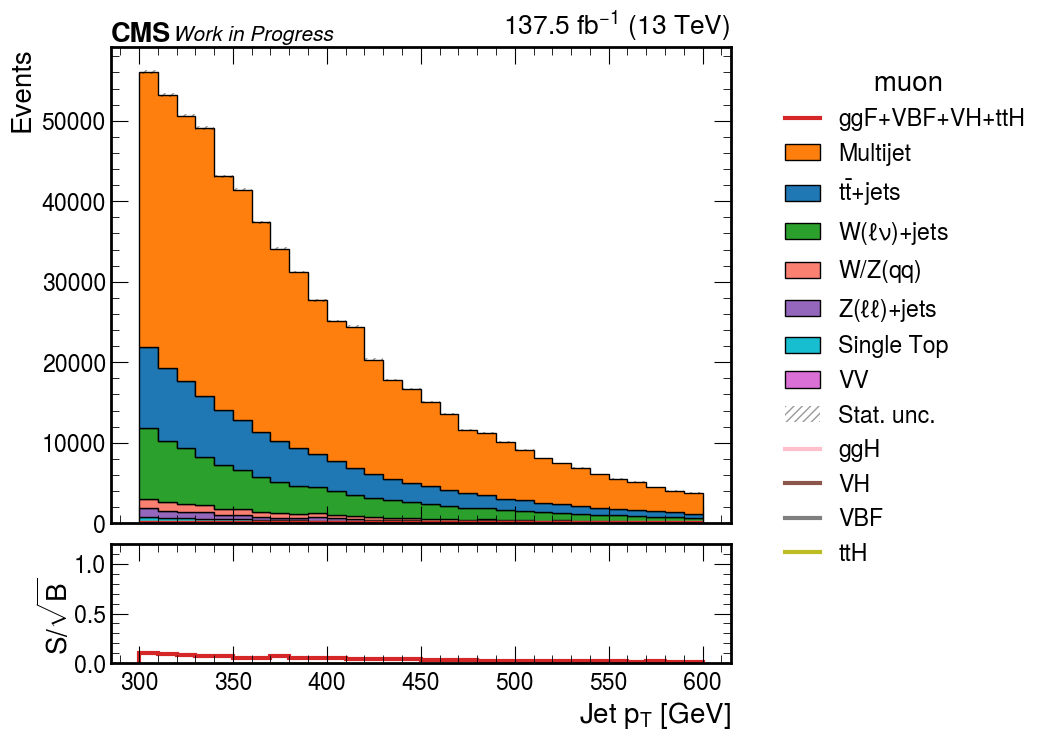

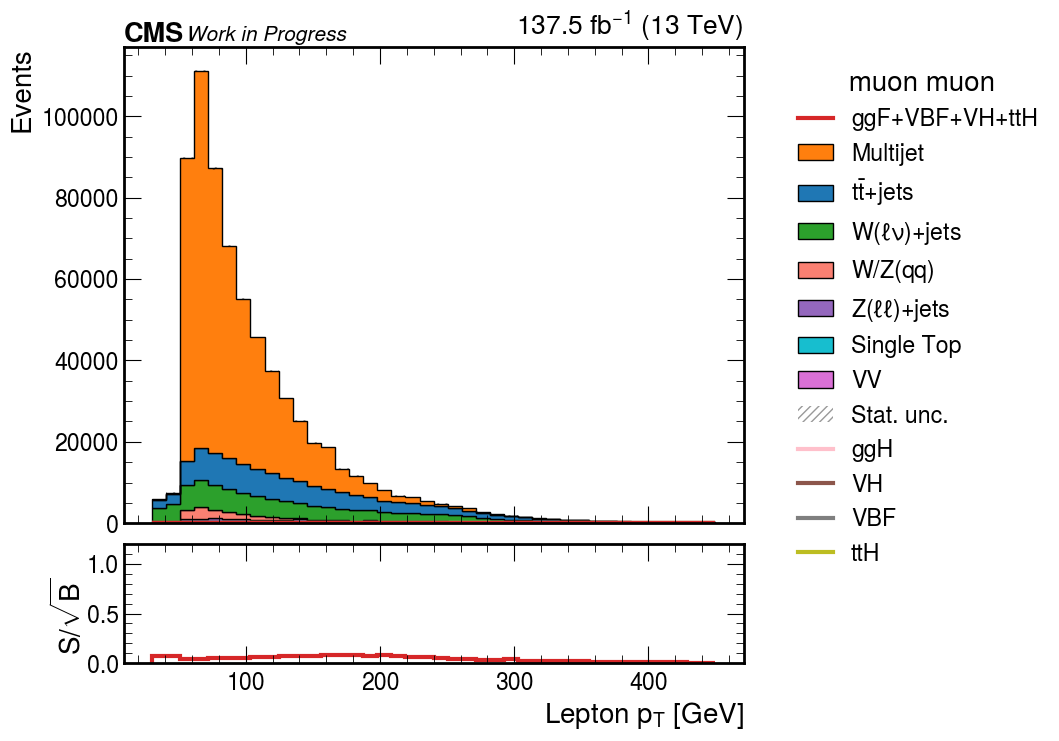

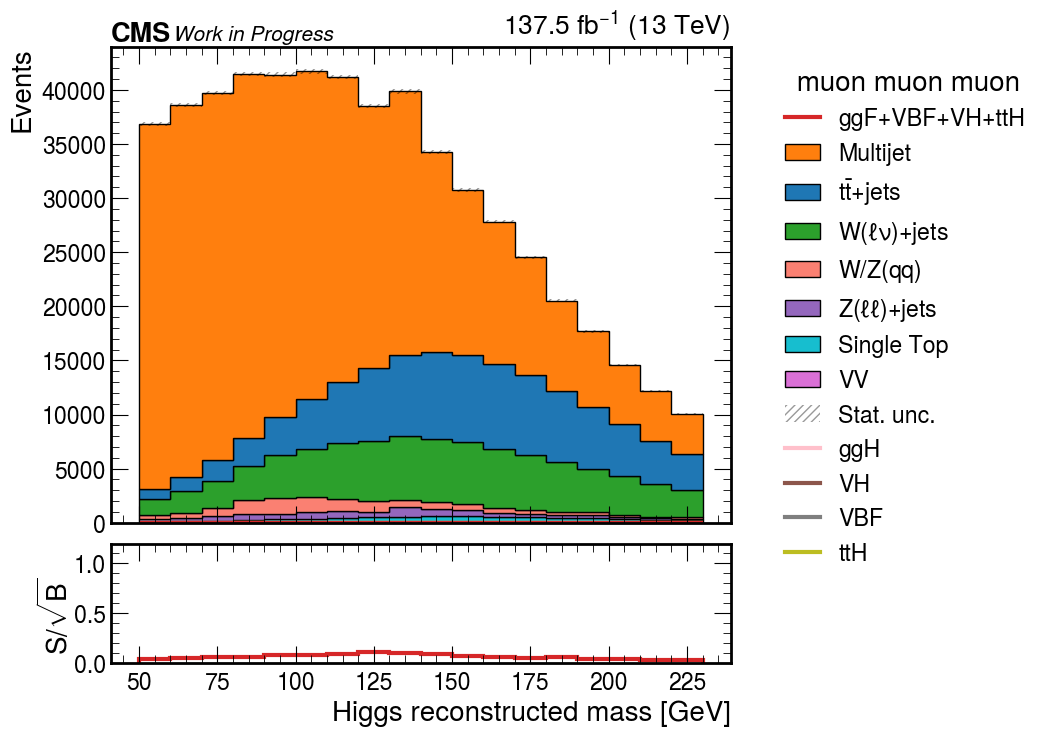

In [124]:
plt.rcParams.update({"font.size": 20})
add_data = False

add_soverb=True
blind_region=None
mult=1
    
from utils import plot_hists
plot_hists(years, channels, hists, vars_to_plot,             
            add_data=add_data,
            logy=False,
            add_soverb=add_soverb,
            only_sig=False,
            mult=mult,
            outpath="/Users/fmokhtar/Desktop/farakikopku5/",
            blind_region=blind_region,
#            save_as=f"{years[0]}_{channels[0]}"
           save_as=f"zzz"
           
          )

# soverb

In [75]:
years = ["2017", "2018", "2016", "2016APV"]
channels = ["mu"]

miso_cuts = [999999, 0.01, 0.05, 0.10, 0.15, 0.20, 0.30]

s_over_b = {}

ev = events_dict["misoNO"]

mass_window = [100, 150]

s_over_b = []
for miso_cut in miso_cuts:
        
    print("miso_cut", miso_cut)
    s, b = 0, 0
    for year in years:
        for ch in channels:
            for sample in ev[year][ch]:
                if sample =="Data":
                    continue

                df = ev[year][ch][sample]   # doesnt include low pt bin

                # add tagger cut
                if ch == "mu":
                    keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
                else:
                    keep = ( ( df["lep_pt"]<120 ) | ( df["lep_pt"]>=120) & (df["lep_misolation"]<miso_cut ) )
                df = df.loc[keep, :]

                # add mass window        
                df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]

                ##############################    
                if sample in utils.signals:
                    s += df["event_weight"].sum()
                else:
#                     if "QCD" in sample:
                    b += df["event_weight"].sum()
    print(f"misocut: {miso_cut}, signal {s}, bkd {b:.3f}")
    s_over_b.append(s/math.sqrt(b))

miso_cut 999999
misocut: 999999, signal 89.54623186972039, bkd 195530.127
miso_cut 0.01
misocut: 0.01, signal 62.570925512138494, bkd 55301.638
miso_cut 0.05
misocut: 0.05, signal 74.00366000861396, bkd 60743.300
miso_cut 0.1
misocut: 0.1, signal 78.64820083553327, bkd 63273.899
miso_cut 0.15
misocut: 0.15, signal 80.54540259233848, bkd 65229.448
miso_cut 0.2
misocut: 0.2, signal 81.80365093541631, bkd 67201.889
miso_cut 0.3
misocut: 0.3, signal 83.34578486337722, bkd 71638.691


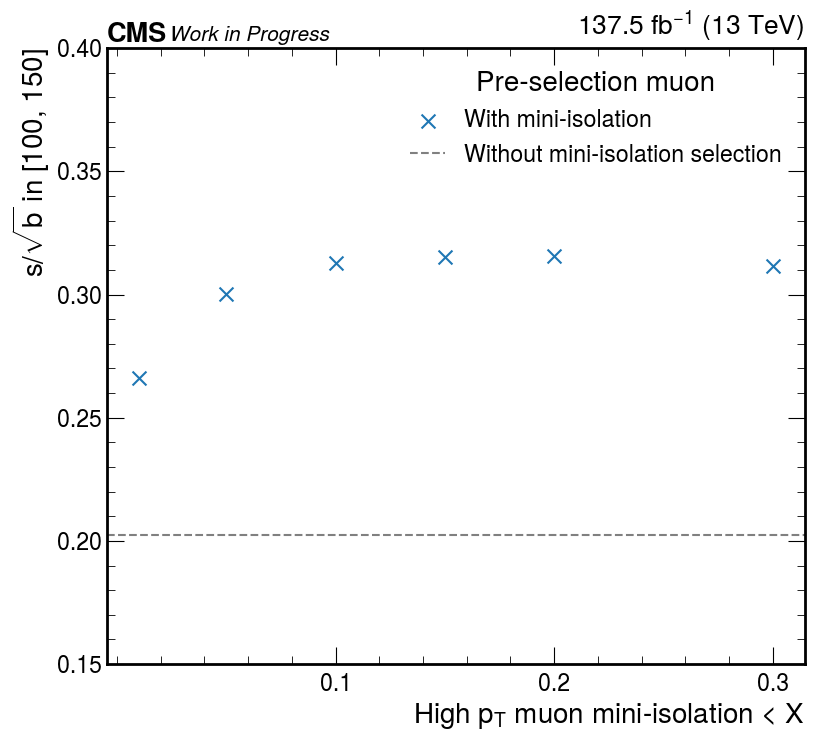

In [76]:
plt.rcParams.update({"font.size": 20})

fig, ax = plt.subplots(figsize=(9, 8))

# for tagger in [
#     "fj_ParT_score_finetuned",
#     "fj_ParT_score_finetuned (after MET>X)",
#     "fj_ParT_score_finetuned (after dphi<X)",
#     "fj_ParT_score_finetuned (after MET>X + dphi<X)", 
# ]:
ax.scatter(miso_cuts[1:], s_over_b[1:], marker="x", s=100, label="With mini-isolation")

ax.axhline(s_over_b[0], color="grey", linestyle="--", label=rf"Without mini-isolation selection")
# ax.axvline(0.2, color="grey", linestyle="--", label=rf"Working point")


ax.legend(title=f"Pre-selection muon")
ax.set_ylabel(r"$s/\sqrt{b}$ in " + f"[{mass_window[0]}, {mass_window[1]}]");
ax.set_xlabel(r"High $p_T$ muon mini-isolation < X")
# ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
ax.set_xticks([0.1, 0.2, 0.3])
ax.set_ylim(0.15, 0.4)
# ax.set_xlim(0,0.3)

lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/miso-soverb-mu.pdf")

# soverb after tagger

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Work in Progress'))

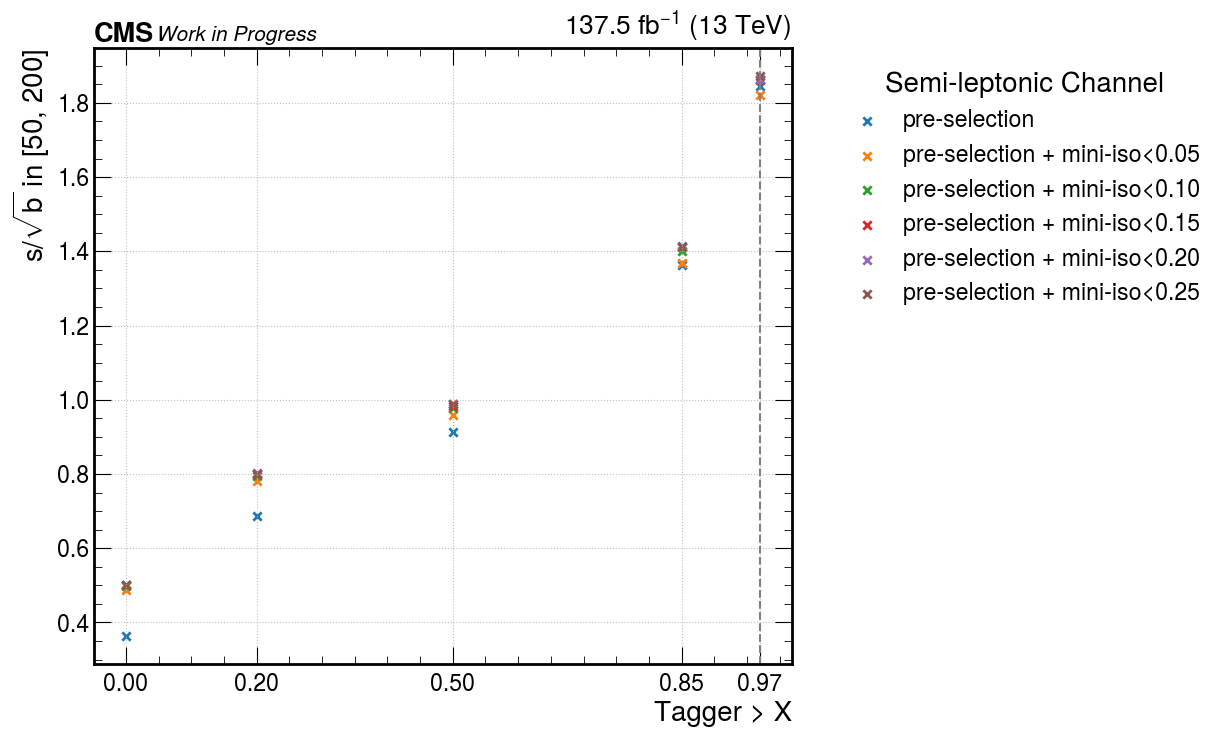

In [34]:
nice_channel = {
    "mu": "Muon",
    "ele": "Electron",
}

plt.rcParams.update({"font.size": 20})
channels = ["mu", "ele"]

fig, ax = plt.subplots(figsize=(9,8))
ax.grid()    

miso_cuts = [999999, 0.05, 0.1, 0.15, 0.20, 0.25]

mass_window = [50, 200]

ev = events_dict["misoNO"]

for miso_cut in miso_cuts:
    if miso_cut==999999:
        cut_label = "pre-selection"
    else:
        cut_label = f"pre-selection + mini-iso<{miso_cut:.2f}"
    
    tagger_cuts = [0, 0.2, 0.5, 0.85, 0.97]

    s = [0]*len(tagger_cuts)
    b = [0]*len(tagger_cuts)
    
    for year in years:
        for ch in channels:
            for sample in ev[year][ch]:

                df = ev[year][ch][sample]   # doesnt include low pt bin

                # add miso cut
                if ch == "mu":
                    keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
                    df = df.loc[keep, :]

                # add mass window        
                df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]

                for i, tagger_cut in enumerate(tagger_cuts):
                    score_cut = (df["fj_ParT_score_finetuned"] > tagger_cut)

                    if sample in utils.signals:
                        s[i] += df["event_weight"][score_cut].sum()
                    else:
                        b[i] += df["event_weight"][score_cut].sum()

    ss = np.array(s)
    bb = np.array(b)
    ax.scatter(tagger_cuts, ss/np.sqrt(bb), marker="x", linewidth=2.0, label=cut_label)

ax.axvline(x=0.97, linestyle="--", color="grey")    
ax.set_xticks(tagger_cuts)
ax.set_xlabel("Tagger > X")
ax.set_ylabel(r"$s/\sqrt{b}$ in " + f"[{mass_window[0]}, {mass_window[1]}]")

if len(channels)==2:
    ax.legend(title="Semi-leptonic Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);
else:
    ax.legend(title=f"{nice_channel[ch]} Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);

lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
# plt.savefig(f"/Users/fmokhtar/Desktop/AN/miniiso1.pdf")

In [48]:
# tagger_cuts = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8]
# tagger_cuts = [0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]
# tagger_cuts = np.linspace(0.7, 0.97, 28)

# tagger_cuts = [0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99]
# tagger_cuts = [0.90, 0.925, 0.95, 0.975, 0.99]

tagger_cuts = np.linspace(0.9, 0.99, 19)
# tagger_cuts = np.linspace(0.9, 0.99, 19*2-1)
# tagger_cuts = np.linspace(0.2, 0.97, 30)
# tagger_cuts = np.linspace(0.1, 0.85, 25)

# tagger_cuts = [0.9, 0.95, 0.97]

# wp = 0.85
mass_window = [50, 200]

years = ["2017", "2018", "2016", "2016APV"]
# years = ["2018"]
channels = ["ele", "mu"]

s_over_b = {}

ev = events_dict["misoNO"]

for tagger in [
#     "fj_ParT_score",
#     "fj_ParT_score (no miso cut)",

    "fj_ParT_score_finetuned (no miso cut)",   
    "fj_ParT_score_finetuned (with miso<0.1)",    
    "fj_ParT_score_finetuned (with miso<0.2)",        
    "fj_ParT_score_finetuned (with miso<0.3)",            
#     "fj_ParT_score_finetuned (after MET>X)",
#     "fj_ParT_score_finetuned (after dphi<X)",        
#     "fj_ParT_score_finetuned (after MET>X + dphi<X)",    
]:

        
    print("TAGGER:", tagger)
    s_over_b[tagger] = []

    for tagger_cut in tagger_cuts:
        print("tagger cut", tagger_cut)
        s, b = 0, 0
        for year in years:
            for ch in channels:
                for sample in ev[year][ch]:
                    if sample =="Data":
                        continue
                                        
                    df = ev[year][ch][sample]   # doesnt include low pt bin

                    if "finetuned" in tagger:
                        df = df[df["fj_ParT_score_finetuned"]>tagger_cut]
                    else:
                        df = df[df["fj_ParT_score"]>tagger_cut]                        
                    
                    if ch =="mu":
                        if "with miso" in tagger:
                            miso_cut = float("fj_ParT_score_finetuned (with miso<0.2)"[-4:-1])
                            
                            keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
                            df = df.loc[keep, :]                  

                    # add mass window        
                    df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]
            
                    ##############################    
                    if sample in utils.signals:
                        s += df["event_weight"].sum()
                    else:
                        b += df["event_weight"].sum()

        s_over_b[tagger].append(s/math.sqrt(b))

TAGGER: fj_ParT_score_finetuned (no miso cut)
tagger cut 0.9
tagger cut 0.905
tagger cut 0.91
tagger cut 0.915
tagger cut 0.92
tagger cut 0.925
tagger cut 0.93
tagger cut 0.935
tagger cut 0.9400000000000001
tagger cut 0.9450000000000001
tagger cut 0.95
tagger cut 0.955
tagger cut 0.96
tagger cut 0.965
tagger cut 0.97
tagger cut 0.975
tagger cut 0.98
tagger cut 0.985
tagger cut 0.99
TAGGER: fj_ParT_score_finetuned (with miso<0.1)
tagger cut 0.9
tagger cut 0.905
tagger cut 0.91
tagger cut 0.915
tagger cut 0.92
tagger cut 0.925
tagger cut 0.93
tagger cut 0.935
tagger cut 0.9400000000000001
tagger cut 0.9450000000000001
tagger cut 0.95
tagger cut 0.955
tagger cut 0.96
tagger cut 0.965
tagger cut 0.97
tagger cut 0.975
tagger cut 0.98
tagger cut 0.985
tagger cut 0.99
TAGGER: fj_ParT_score_finetuned (with miso<0.2)
tagger cut 0.9
tagger cut 0.905
tagger cut 0.91
tagger cut 0.915
tagger cut 0.92
tagger cut 0.925
tagger cut 0.93
tagger cut 0.935
tagger cut 0.9400000000000001
tagger cut 0.945000

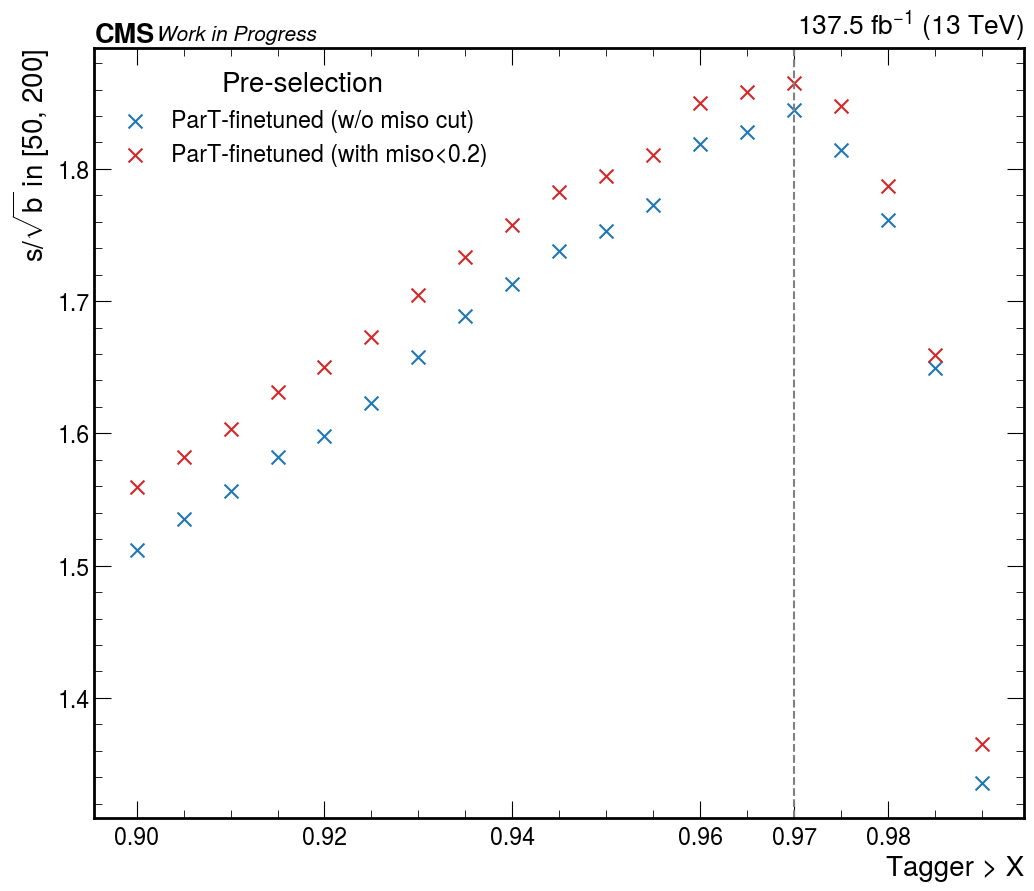

In [57]:
color_dict = {    
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:green",   
    
    "fj_ParT_score (no miso cut)": "tab:orange",

    "fj_ParT_score_finetuned (no miso cut)": "tab:red",      
    
    "fj_ParT_score_finetuned (no miso cut)": "tab:blue",
    "fj_ParT_score_finetuned (with miso<0.1)": "tab:orange",
    "fj_ParT_score_finetuned (with miso<0.2)": "tab:red",
    "fj_ParT_score_finetuned (with miso<0.3)": "tab:green",
}

lab_dict = {    
#     "fj_ParT_score": "ParT",

    "fj_ParT_score_finetuned (no miso cut)": "ParT-finetuned (w/o miso cut)",
    "fj_ParT_score_finetuned (with miso<0.1)": "ParT-finetuned (with miso<0.1)",
    "fj_ParT_score_finetuned (with miso<0.2)": "ParT-finetuned (with miso<0.2)",
    "fj_ParT_score_finetuned (with miso<0.3)": "ParT-finetuned (with miso<0.3)", 
}


plt.rcParams.update({"font.size": 20})


fig, ax = plt.subplots(figsize=(12, 10))

for tagger in [
#     "fj_ParT_score",
#     "fj_ParT_score (no miso cut)",

    "fj_ParT_score_finetuned (no miso cut)",   
#     "fj_ParT_score_finetuned (with miso<0.1)",    
    "fj_ParT_score_finetuned (with miso<0.2)",        
#     "fj_ParT_score_finetuned (with miso<0.3)",  
]:
    ax.scatter(tagger_cuts, s_over_b[tagger], marker="x", s=100, label=lab_dict[tagger], color=color_dict[tagger])

ax.axvline(0.97, color="grey", linestyle="--")#, label=rf"125 GeV")

# ax.set_ylim(1.25, 2.25)
ax.legend(title=f"Pre-selection")
ax.set_ylabel(r"$s/\sqrt{b}$ in " + f"[{mass_window[0]}, {mass_window[1]}]");
ax.set_xlabel(r"Tagger > X")
# ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])


lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/miso-tagger-soverb.pdf")

## Get s/b

In [10]:
channels = ["mu"]

miso_cuts = [999999, 0.06, 0.08, 0.1, 0.12, 0.14, 0.18, 0.20, 0.22, 0.26]

s, b = {}, {}
for b4_or_af in ["After tagger", "Before tagger"]:
    s[b4_or_af], b[b4_or_af] = {}, {}

    for miso_cut in miso_cuts:
        if miso_cut==999999:
            cut_label = "pre-selection"
        else:
            cut_label = f"pre-selection + mini-iso<{miso_cut:.2f}"

        s[b4_or_af][cut_label], b[b4_or_af][cut_label] = 0, 0

        for ch in channels:   # sum over channels (in this case only "mu")
            for sample in events_dict[ch]:

                df = events_dict[ch][sample]
                
                ### apply tagger cut
                if b4_or_af == "After tagger":
                    keep = ( df["inclusive_score"]>0.9 )
                    df = df.loc[keep, :]

                ### apply mini-isolation cut
                keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
                df = df.loc[keep, :]
                
                ### mass window
                regressed_mass = df["fj_ParT_mass"]     
                lep_fj_m = df["fj_minus_lep_m"]     
        #         mass_window = (regressed_mass>100) & (regressed_mass<150)
                mass_window = (lep_fj_m>0) & (lep_fj_m<150)

                ### s/b
                ev_weight = df["event_weight"]        
                if sample in utils.signals:
                    s[b4_or_af][cut_label] += ev_weight[mass_window].sum()
                else:
                    b[b4_or_af][cut_label] += ev_weight[mass_window].sum()    
                    
for b4_or_af in ["Before tagger", "After tagger"]:
    print(f"{b4_or_af} cut:")
    for miso_cut in s[b4_or_af]:
        print(f"{miso_cut} : s/b = {s[b4_or_af][miso_cut]/math.sqrt(b[b4_or_af][miso_cut]):.3f}")
    print("-----------------------")                             

Before tagger cut:
pre-selection : s/b = 0.220
pre-selection + mini-iso<0.06 : s/b = 0.389
pre-selection + mini-iso<0.08 : s/b = 0.392
pre-selection + mini-iso<0.10 : s/b = 0.394
pre-selection + mini-iso<0.12 : s/b = 0.395
pre-selection + mini-iso<0.14 : s/b = 0.394
pre-selection + mini-iso<0.18 : s/b = 0.390
pre-selection + mini-iso<0.20 : s/b = 0.388
pre-selection + mini-iso<0.22 : s/b = 0.386
pre-selection + mini-iso<0.26 : s/b = 0.380
-----------------------
After tagger cut:
pre-selection : s/b = 0.420
pre-selection + mini-iso<0.06 : s/b = 0.680
pre-selection + mini-iso<0.08 : s/b = 0.686
pre-selection + mini-iso<0.10 : s/b = 0.691
pre-selection + mini-iso<0.12 : s/b = 0.692
pre-selection + mini-iso<0.14 : s/b = 0.692
pre-selection + mini-iso<0.18 : s/b = 0.690
pre-selection + mini-iso<0.20 : s/b = 0.685
pre-selection + mini-iso<0.22 : s/b = 0.686
pre-selection + mini-iso<0.26 : s/b = 0.676
-----------------------


In [13]:
channels = ["mu"]

miso_cuts = [0.1, 0.20]

qcd = {}
for b4_or_af in ["After tagger", "Before tagger"]:
    qcd[b4_or_af] = {}
    
    for miso_cut in miso_cuts:
        cut_label = f"pre-selection + mini-iso>{miso_cut:.2f}"
        qcd[b4_or_af][cut_label] = 0

        for ch in channels:   # sum over channels (in this case only "mu")
            df = events_dict[ch]["QCD"]

            ### apply tagger cut
            if b4_or_af == "After tagger":
                keep = ( df["inclusive_score"]>0.9 )
                df = df.loc[keep, :]

            ### apply mini-isolation cut
            keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]>miso_cut ) )
            df = df.loc[keep, :]

            ### mass window
            lep_fj_m = df["fj_minus_lep_m"]     
            mass_window = (lep_fj_m>0) & (lep_fj_m<150)

            ### s/b
            ev_weight = df["event_weight"]        
            qcd[b4_or_af][cut_label] += ev_weight[mass_window].sum()    

for b4_or_af in ["Before tagger", "After tagger"]:
    print(f"{b4_or_af} cut:")
    for miso_cut in qcd[b4_or_af]:
        print(f"{miso_cut} : qcd = {qcd[b4_or_af][miso_cut]:.3f}")
    print("-----------------------")                             

Before tagger cut:
pre-selection + mini-iso>0.10 : qcd = 2130014.730
pre-selection + mini-iso>0.20 : qcd = 2068699.330
-----------------------
After tagger cut:
pre-selection + mini-iso>0.10 : qcd = 101064.122
pre-selection + mini-iso>0.20 : qcd = 98218.973
-----------------------


In [17]:
channels = ["mu"]

miso_cuts = [0.1, 0.2]

s, b = {}, {}
for b4_or_af in ["After tagger", "Before tagger"]:
    s[b4_or_af], b[b4_or_af] = {}, {}
    
    for miso_cut in miso_cuts:
        cut_label = f"pre-selection + mini-iso>{miso_cut:.2f}"

        s[b4_or_af][cut_label], b[b4_or_af][cut_label] = 0, 0

        for ch in channels:   # sum over channels (in this case only "mu")
            for sample in events_dict[ch]:

                df = events_dict[ch][sample]
                
                ### apply tagger cut
                if b4_or_af == "After tagger":
                    keep = ( df["inclusive_score"]>0.9 )
                    df = df.loc[keep, :]

                ### apply mini-isolation cut
                keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]>miso_cut ) )
                df = df.loc[keep, :]
                
                ### mass window
                regressed_mass = df["fj_ParT_mass"]     
                lep_fj_m = df["fj_minus_lep_m"]     
        #         mass_window = (regressed_mass>100) & (regressed_mass<150)
                mass_window = (lep_fj_m>0) & (lep_fj_m<150)

                ### s/b
                ev_weight = df["event_weight"]        
                if sample in ["QCD"]:
                    s[b4_or_af][cut_label] += ev_weight[mass_window].sum()
                else:
                    b[b4_or_af][cut_label] += ev_weight[mass_window].sum()    
                    
print("FOR s=QCD and b=others")
print("-----------------------")  

for b4_or_af in ["Before tagger", "After tagger"]:
    print(f"{b4_or_af} cut:")
    for miso_cut in s[b4_or_af]:
        print(f"{miso_cut} : s/b = {s[b4_or_af][miso_cut]/math.sqrt(b[b4_or_af][miso_cut]):.3f}")
    print("-----------------------")                             

FOR s=QCD and b=others
-----------------------
Before tagger cut:
pre-selection + mini-iso>0.10 : s/b = 8217.335
pre-selection + mini-iso>0.20 : s/b = 8316.382
-----------------------
After tagger cut:
pre-selection + mini-iso>0.10 : s/b = 902.323
pre-selection + mini-iso>0.20 : s/b = 915.812
-----------------------


# s/b as a function of the tagger cut

In [10]:
label_by_ch = {
    "mu": "Muon",
    "ele": "Electron"
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


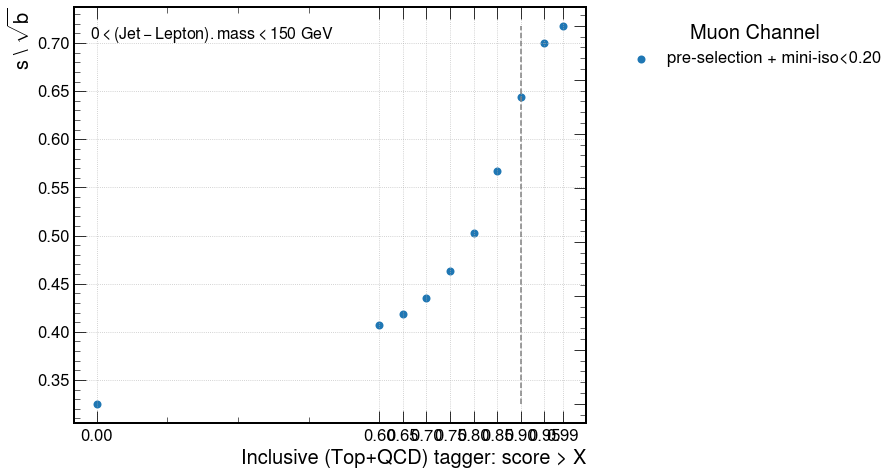

In [20]:
plt.rcParams.update({"font.size": 20})
channels = ["mu"]

fig, ax = plt.subplots(figsize=(13,7))
ax.grid()    

miso_cuts = [0.2]
for miso_cut in miso_cuts:
    if miso_cut==999999:
        cut_label = "pre-selection"
    else:
        cut_label = f"pre-selection + mini-iso<{miso_cut:.2f}"
    
    tagger_cuts = [0, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

    s = [0]*len(tagger_cuts)
    b = [0]*len(tagger_cuts)

    for ch in channels:
        for sample in events_dict[ch]:
            
            df = events_dict[ch][sample]
            ### apply mini-isolation cut
            keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
            df = df.loc[keep, :]
                        
            ev_weight = df["event_weight"]
            score = df["inclusive_score"]

            mass_window = (df["fj_minus_lep_m"]>0) & (df["fj_minus_lep_m"]<150)

            for i, tagger_cut in enumerate(tagger_cuts):
                score_cut = (score > tagger_cut)
                if sample in utils.signals:
                    s[i] += ev_weight[mass_window & score_cut].sum()     
                else:
                    b[i] += ev_weight[mass_window & score_cut].sum()

    ss = np.array(s)
    bb = np.array(b)
    ax.scatter(tagger_cuts, ss/np.sqrt(bb) , linewidth=2.0, label=cut_label)

ax.set_xticks(tagger_cuts)
ax.set_xlabel("Inclusive (Top+QCD) tagger: score > X")
ax.set_ylabel(r"s \ $\sqrt{b}$")
if len(channels)==2:
    ax.legend(title="Semi-leptonic Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);
else:
    ax.legend(title=f"{label_by_ch[ch]} Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);

ax2 = ax.twinx()
ax2.set_yticklabels([])
ax2.legend(title=r"$0<(Jet-Lepton).mass<150$ GeV", title_fontsize=16, loc=2)
plt.vlines(x=0.9, ymin=0, ymax=0.7, linestyle="--", color="grey")
plt.tight_layout()

In [19]:
ss/np.sqrt(bb)

array([0.33030843, 0.40257113, 0.41451424, 0.43196174, 0.46048976,
       0.50249386, 0.56795042, 0.65045608, 0.70070077, 0.70918491])

In [21]:
ss/np.sqrt(bb)

array([0.32509703, 0.40658053, 0.41816546, 0.43526701, 0.46276472,
       0.50276539, 0.56715294, 0.64386956, 0.70005241, 0.71779506])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


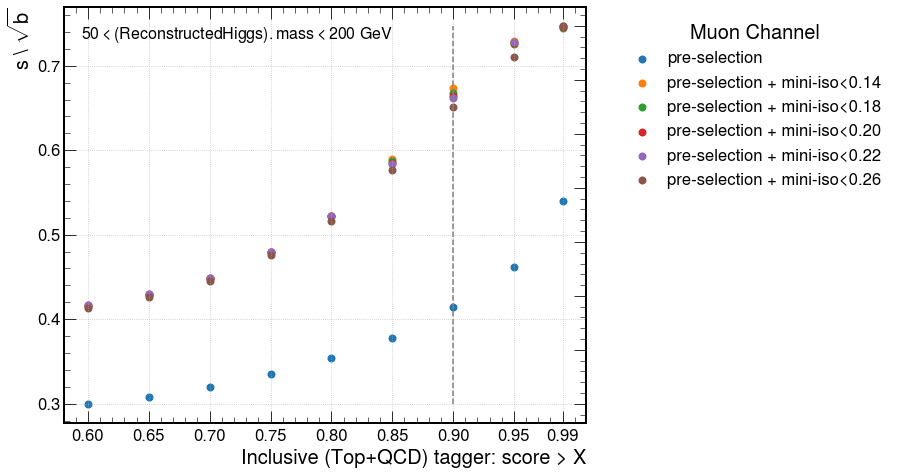

In [66]:
plt.rcParams.update({"font.size": 20})
channels = ["mu"]

fig, ax = plt.subplots(figsize=(13,7))
ax.grid()    

miso_cuts = [999999, 0.14, 0.18, 0.20, 0.22, 0.26]
for miso_cut in miso_cuts:
    if miso_cut==999999:
        cut_label = "pre-selection"
    else:
        cut_label = f"pre-selection + mini-iso<{miso_cut:.2f}"
    
    tagger_cuts = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

    s = [0]*len(tagger_cuts)
    b = [0]*len(tagger_cuts)

    for ch in channels:
        for sample in events_dict[ch]:
            
            df = events_dict[ch][sample]
            ### apply mini-isolation cut
            keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
            df = df.loc[keep, :]
                        
            ev_weight = df["event_weight"]
            score = df["inclusive_score"]
            
            mass_window = (df["rec_higgs_m"]>50) & (df["rec_higgs_m"]<200)

            for i, tagger_cut in enumerate(tagger_cuts):
                score_cut = (score > tagger_cut)
                if sample in signals:
                    s[i] += ev_weight[mass_window & score_cut].sum()     
                else:
                    b[i] += ev_weight[mass_window & score_cut].sum()

    ss = np.array(s)
    bb = np.array(b)
    ax.scatter(tagger_cuts, ss/np.sqrt(bb) , linewidth=2.0, label=cut_label)

ax.set_xticks(tagger_cuts)
ax.set_xlabel("Inclusive (Top+QCD) tagger: score > X")
ax.set_ylabel(r"s \ $\sqrt{b}$")
if len(channels)==2:
    ax.legend(title="Semi-leptonic Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);
else:
    ax.legend(title=f"{nice_channel[ch]} Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);

ax2 = ax.twinx()
ax2.set_yticklabels([])
ax2.legend(title=r"$50<(Reconstructed Higgs).mass<200$ GeV", title_fontsize=16, loc=2)
plt.vlines(x=0.9, ymin=0, ymax=0.7, linestyle="--", color="grey")
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


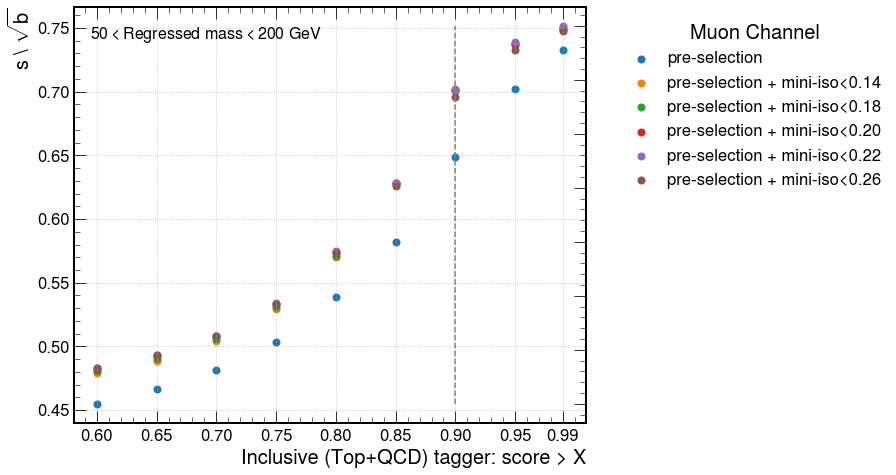

In [67]:
plt.rcParams.update({"font.size": 20})
channels = ["mu"]

fig, ax = plt.subplots(figsize=(13,7))
ax.grid()    

miso_cuts = [999999, 0.14, 0.18, 0.20, 0.22, 0.26]
for miso_cut in miso_cuts:
    if miso_cut==999999:
        cut_label = "pre-selection"
    else:
        cut_label = f"pre-selection + mini-iso<{miso_cut:.2f}"
    
    tagger_cuts = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

    s = [0]*len(tagger_cuts)
    b = [0]*len(tagger_cuts)

    for ch in channels:
        for sample in events_dict[ch]:
            
            df = events_dict[ch][sample]
            ### apply mini-isolation cut
            keep = ( ( df["lep_pt"]<55 ) | ( df["lep_pt"]>=55) & (df["lep_misolation"]<miso_cut ) )
            df = df.loc[keep, :]
                        
            ev_weight = df["event_weight"]
            score = df["inclusive_score"]
            
            mass_window = (df["fj_ParT_mass"]>50) & (df["fj_ParT_mass"]<200)

            for i, tagger_cut in enumerate(tagger_cuts):
                score_cut = (score > tagger_cut)
                if sample in signals:
                    s[i] += ev_weight[mass_window & score_cut].sum()     
                else:
                    b[i] += ev_weight[mass_window & score_cut].sum()

    ss = np.array(s)
    bb = np.array(b)
    ax.scatter(tagger_cuts, ss/np.sqrt(bb) , linewidth=2.0, label=cut_label)

ax.set_xticks(tagger_cuts)
ax.set_xlabel("Inclusive (Top+QCD) tagger: score > X")
ax.set_ylabel(r"s \ $\sqrt{b}$")
if len(channels)==2:
    ax.legend(title="Semi-leptonic Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);
else:
    ax.legend(title=f"{nice_channel[ch]} Channel", bbox_to_anchor=(1.05, 1), loc="upper left",);

ax2 = ax.twinx()
ax2.set_yticklabels([])
ax2.legend(title=r"$50<$Regressed mass$<200$ GeV", title_fontsize=16, loc=2)
plt.vlines(x=0.9, ymin=0, ymax=0.7, linestyle="--", color="grey")
plt.tight_layout()